In [1]:
# Data Manipulation libraries:
import numpy as np
import pandas as pd
from copy import deepcopy

# Plotting libraries
import mplsoccer
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.patheffects as path_effects

from highlight_text import fig_text
from plotly.subplots import make_subplots
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
!pip install highlight_text


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Load the Data

In [3]:
eventDataWC22 = pd.read_csv("../data/WC22_matchwise_event_data.csv",
                              low_memory=False)

In [4]:
seasonMetaDataWC22 = pd.read_csv("../data/season_WC22matchwise_data.csv",
                              low_memory=False)

In [5]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 100)

# Feature Engineering

In [6]:
eventDataWC22.shape

(234349, 143)

In [7]:
seasonMetaDataWC22.columns.values

array(['Unnamed: 0', 'match_id', 'match_date', 'kick_off', 'home_score',
       'away_score', 'match_status', 'match_status_360', 'last_updated',
       'last_updated_360', 'match_week', 'competition.competition_id',
       'competition.country_name', 'competition.competition_name',
       'season.season_id', 'season.season_name', 'home_team.home_team_id',
       'home_team.home_team_name', 'home_team.home_team_gender',
       'home_team.home_team_group', 'home_team.country.id',
       'home_team.country.name', 'home_team.managers',
       'away_team.away_team_id', 'away_team.away_team_name',
       'away_team.away_team_gender', 'away_team.away_team_group',
       'away_team.country.id', 'away_team.country.name',
       'away_team.managers', 'metadata.data_version',
       'metadata.shot_fidelity_version', 'metadata.xy_fidelity_version',
       'competition_stage.id', 'competition_stage.name', 'stadium.id',
       'stadium.name', 'stadium.country.id', 'stadium.country.name',
       're

## `startX`, `startY`

In [8]:
# Start location for any action:
eventDataWC22["startX"] = eventDataWC22["location"]\
    .str.split(", ", expand=True)[0].str[1:].apply(pd.to_numeric)
eventDataWC22["startY"] = eventDataWC22["location"]\
    .str.split(", ", expand=True)[1].str[:-1].apply(pd.to_numeric)

## `winner` Column

In [9]:
homeWinCond = seasonMetaDataWC22["home_score"] > seasonMetaDataWC22["away_score"]
awayWinCond = seasonMetaDataWC22["home_score"] < seasonMetaDataWC22["away_score"]

seasonMetaDataWC22["winner"] = np.where(homeWinCond,
                                        seasonMetaDataWC22["home_team.home_team_name"],
                                        np.where(awayWinCond,
                                                 seasonMetaDataWC22["away_team.away_team_name"],
                                                 "Draw"))

In [10]:
seasonMetaDataWC22.head()

,Unnamed: 0,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition.competition_id,competition.country_name,competition.competition_name,season.season_id,season.season_name,home_team.home_team_id,home_team.home_team_name,home_team.home_team_gender,home_team.home_team_group,home_team.country.id,home_team.country.name,home_team.managers,away_team.away_team_id,away_team.away_team_name,away_team.away_team_gender,away_team.away_team_group,away_team.country.id,away_team.country.name,away_team.managers,metadata.data_version,metadata.shot_fidelity_version,metadata.xy_fidelity_version,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name,winner
0,0,3869321,2022-12-09,21:00:00.000,2,2,available,available,2023-02-22T21:53:34.831147,2022-12-21T16:00:52.544228,5,43,International,FIFA World Cup,106,2022,941,Netherlands,male,NaN,160,Netherlands,"[{'id': 788, 'name': 'Louis van Gaal', 'nickna...",779,Argentina,male,NaN,11,Argentina,"[{'id': 5677, 'name': 'Lionel Sebastián Scalon...",1.1.0,2,2,11,Quarter-finals,1001114,Lusail Stadium,185,Qatar,180.0,Antonio Miguel Mateu Lahoz,214.0,Spain,Draw
1,1,3857287,2022-11-24,15:00:00.000,0,0,available,available,2023-02-20T15:37:52.473063,2023-01-16T11:52:54.926256,1,43,International,FIFA World Cup,106,2022,783,Uruguay,male,H,242,Uruguay,"[{'id': 3633, 'name': 'Diego Martín Alonso Lóp...",791,South Korea,male,H,121,Korea (South),"[{'id': 5688, 'name': 'Paulo Jorge Gomes Bento...",1.1.0,2,2,10,Group Stage,94425,Education City Stadium,185,Qatar,76.0,Clément Turpin,78.0,France,Draw
2,2,3869486,2022-12-10,17:00:00.000,1,0,available,available,2023-02-20T13:56:36.165484,2023-01-04T12:36:10.102347,5,43,International,FIFA World Cup,106,2022,788,Morocco,male,NaN,154,Morocco,"[{'id': 1001086, 'name': 'Hoalid Regragui', 'n...",780,Portugal,male,NaN,183,Portugal,"[{'id': 607, 'name': 'Fernando Manuel Fernande...",1.1.0,2,2,11,Quarter-finals,1000838,Al Thumama Stadium,185,Qatar,1094.0,Facundo Tello Figueroa,11.0,Argentina,Morocco
3,3,3869685,2022-12-18,17:00:00.000,3,3,available,available,2023-02-20T07:27:19.374380,2022-12-21T16:02:21.075183,7,43,International,FIFA World Cup,106,2022,779,Argentina,male,NaN,11,Argentina,"[{'id': 5677, 'name': 'Lionel Sebastián Scalon...",771,France,male,NaN,78,France,"[{'id': 545, 'name': 'Didier Deschamps', 'nick...",1.1.0,2,2,26,Final,1001114,Lusail Stadium,185,Qatar,367.0,Szymon Marciniak,182.0,Poland,Draw
4,4,3857260,2022-11-30,21:00:00.000,1,2,available,available,2023-02-20T04:37:45.714523,2022-12-01T19:56:40.363859,3,43,International,FIFA World Cup,106,2022,799,Saudi Arabia,male,C,200,Saudi Arabia,"[{'id': 642, 'name': 'Hervé Renard', 'nickname...",794,Mexico,male,C,147,Mexico,"[{'id': 163, 'name': 'Gerardo Daniel Martino',...",1.1.0,2,2,10,Group Stage,1001114,Lusail Stadium,185,Qatar,1.0,Michael Oliver,68.0,England,Mexico


## `started` Column

In [11]:
from ast import literal_eval

In [12]:
""" Get the Line-up Data """
finalLineUpdf = pd.DataFrame()
for m_id in eventDataWC22["match_id"].unique():
    print(m_id, "\n")
    match_df = eventDataWC22[(eventDataWC22["match_id"] == m_id)
                                    & (eventDataWC22["type.id"] == 35)]["tactics.lineup"].apply(literal_eval)
    
    df1 = pd.json_normalize(match_df.iloc[0])
    df2 = pd.json_normalize(match_df.iloc[1])

    df = df1.append(df2)
    df.insert(0, "match_id", m_id)
    
    df["started"] = "Yes"
    
    finalLineUpdf = finalLineUpdf.append(df)

3869321 



C:\Users\user\AppData\Local\Temp/ipykernel_9224/2788223387.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)
C:\Users\user\AppData\Local\Temp/ipykernel_9224/2788223387.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalLineUpdf = finalLineUpdf.append(df)
C:\Users\user\AppData\Local\Temp/ipykernel_9224/2788223387.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)
C:\Users\user\AppData\Local\Temp/ipykernel_9224/2788223387.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalLineUpdf = finalLineUpdf.append(df)
C:\Users\user\AppData\Local\Temp/ipykernel_9224/2788223387.py:11: Future

3857287 

3869486 

3869685 

3857260 

3857264 

3857266 

3857289 

3857269 

3857294 

3857258 

3869254 

3869118 

3869684 

3869519 

3869354 

3869552 

3869420 

3869220 

3869219 



C:\Users\user\AppData\Local\Temp/ipykernel_9224/2788223387.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)
C:\Users\user\AppData\Local\Temp/ipykernel_9224/2788223387.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalLineUpdf = finalLineUpdf.append(df)
C:\Users\user\AppData\Local\Temp/ipykernel_9224/2788223387.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)
C:\Users\user\AppData\Local\Temp/ipykernel_9224/2788223387.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalLineUpdf = finalLineUpdf.append(df)
C:\Users\user\AppData\Local\Temp/ipykernel_9224/2788223387.py:11: Future

3869253 

3869151 

3869152 

3869117 

3857256 

3857270 

3857263 

3857259 

3857295 

3857283 

3857284 

3857282 

3857286 

3857301 

3857300 

3857299 

3857298 

3857297 



C:\Users\user\AppData\Local\Temp/ipykernel_9224/2788223387.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)
C:\Users\user\AppData\Local\Temp/ipykernel_9224/2788223387.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalLineUpdf = finalLineUpdf.append(df)
C:\Users\user\AppData\Local\Temp/ipykernel_9224/2788223387.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)
C:\Users\user\AppData\Local\Temp/ipykernel_9224/2788223387.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalLineUpdf = finalLineUpdf.append(df)
C:\Users\user\AppData\Local\Temp/ipykernel_9224/2788223387.py:11: Future

3857296 

3857293 

3857292 

3857291 

3857290 

3857288 

3857285 

3857281 

3857280 

3857279 

3857278 

3857277 

3857276 

3857275 

3857274 

3857273 

3857272 

3857271 

3857268 

3857267 

3857265 

3857262 

3857261 

3857257 

3857255 

3857254 



C:\Users\user\AppData\Local\Temp/ipykernel_9224/2788223387.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)
C:\Users\user\AppData\Local\Temp/ipykernel_9224/2788223387.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalLineUpdf = finalLineUpdf.append(df)
C:\Users\user\AppData\Local\Temp/ipykernel_9224/2788223387.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)
C:\Users\user\AppData\Local\Temp/ipykernel_9224/2788223387.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalLineUpdf = finalLineUpdf.append(df)
C:\Users\user\AppData\Local\Temp/ipykernel_9224/2788223387.py:11: Future

In [13]:
df.columns

Index(['match_id', 'jersey_number', 'player.id', 'player.name', 'position.id',
       'position.name', 'started'],
      dtype='object')

In [14]:
""" Merge Line-up data with Events Data """
eventDataWC22 = pd.merge(eventDataWC22,
                         finalLineUpdf[['match_id', 'player.id', 'jersey_number', 'started']],
                         how="left",
                         on=['match_id', 'player.id'])

In [15]:
eventDataWC22.shape

(234349, 147)

In [16]:
eventDataWC22.drop_duplicates(subset=["match_id", "player.id"])\
    .groupby(["match_id"]).apply(lambda x: (x["started"] == "Yes").sum()).unique()

array([22], dtype=int64)

## `minsPlayed` Column

In [17]:
""" Compute the minute when the sub came on to the pitch  """

# Initialize sub-in data:
subInData = eventDataWC22[["match_id", "substitution.replacement.id", "minute"]]\
.dropna(subset=["substitution.replacement.id"])
# Rename columns:
subInData.rename(columns={"minute": "minMinute",
                        "substitution.replacement.id": "subID"}, inplace=True)
# Merge newly computed data to events data:
eventDataWC22 = pd.merge(eventDataWC22, subInData, how="left",
                         left_on=["match_id", "player.id"],
                         right_on=["match_id", "subID"])

In [18]:
""" Compute the minute when the sub left the pitch  """

# Initialize sub-in data:
subOutData = eventDataWC22[eventDataWC22['substitution.outcome.id'].notnull()]\
            [["match_id", "player.id", "minute"]]
# Rename columns:
subOutData.rename(columns={"minute": "maxMinute"}, inplace=True)
# Merge newly computed data to events data:
eventDataWC22 = pd.merge(eventDataWC22, subOutData,
                         how="left",
                         on=["match_id", "player.id"])

In [19]:
""" Computing minimum and maximum value of mins for every player """

eventDataWC22["maxMinsMatch"] =\
    eventDataWC22.groupby(["match_id"])["minute"].transform(lambda x: x.max())

eventDataWC22["minMinute"] = np.where(eventDataWC22["started"] == "Yes",
                                             0, eventDataWC22["minMinute"])

eventDataWC22["maxMinute"] = np.where(eventDataWC22["maxMinute"].isnull(),
                                             eventDataWC22["maxMinsMatch"],
                                             eventDataWC22["maxMinute"])

In [20]:
""" Compute Final total Mins Played for every player in every match """

eventDataWC22["minsPlayed"] = eventDataWC22["maxMinute"].subtract(eventDataWC22["minMinute"])

eventDataWC22.head(10)

,Unnamed: 0,match_id,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,...,block.deflection,clearance.other,shot.deflected,block.save_block,pass.straight,dribble.no_touch,pass.miscommunication,shot.open_goal,shot.saved_to_post,goalkeeper.shot_saved_to_post,half_start.late_video_start,shot.saved_off_target,goalkeeper.shot_saved_off_target,goalkeeper.success_in_play,shot.redirect,goalkeeper.lost_in_play,startX,startY,jersey_number,started,subID,minMinute,maxMinute,maxMinsMatch,minsPlayed
0,0,3869321,2711b794-0ad8-40ca-a3e0-76b8ca1cf575,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,941,Netherlands,1,Regular Play,941,Netherlands,3412.0,"[{'player': {'id': 8326, 'name': 'Andries Nopp...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.0,127,NaN
1,1,3869321,23d7048c-d90c-490b-8049-507a39542c65,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,941,Netherlands,1,Regular Play,779,Argentina,352.0,"[{'player': {'id': 6909, 'name': 'Damián Emili...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.0,127,NaN
2,2,3869321,22f97714-6bc3-49e5-be87-3ca5a643df66,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,941,Netherlands,1,Regular Play,779,Argentina,NaN,NaN,['63f2db4c-9b3b-460e-b6f3-36b663c206ea'],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.0,127,NaN
3,3,3869321,63f2db4c-9b3b-460e-b6f3-36b663c206ea,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,941,Netherlands,1,Regular Play,941,Netherlands,NaN,NaN,['22f97714-6bc3-49e5-be87-3ca5a643df66'],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.0,127,NaN
4,4,3869321,953c3480-62e2-473d-a38c-3b725458c0a9,5,1,00:00:00.335,0,0,2,1.712599,30,Pass,941,Netherlands,9,From Kick Off,941,Netherlands,NaN,NaN,['97a79703-d0ed-412b-8eea-ae640bd2ca56'],"[60.0, 40.0]",2988.0,Memphis Depay,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,40.0,10.0,Yes,NaN,0.0,77.0,127,77.0
5,5,3869321,97a79703-d0ed-412b-8eea-ae640bd2ca56,6,1,00:00:02.047,0,2,2,NaN,42,Ball Receipt*,941,Netherlands,9,From Kick Off,941,Netherlands,NaN,NaN,['953c3480-62e2-473d-a38c-3b725458c0a9'],"[36.3, 34.9]",3306.0,Nathan Aké,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.3,34.9,5.0,Yes,NaN,0.0,127.0,127,127.0
6,6,3869321,1e747d12-39a6-4c94-90f6-0b1f2a0b48e9,7,1,00:00:02.047,0,2,2,1.461437,43,Carry,941,Netherlands,9,From Kick Off,941,Netherlands,NaN,NaN,"['97a79703-d0ed-412b-8eea-ae640bd2ca56', 'd29f...","[36.3, 34.9]",3306.0,Nathan Aké,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.3,34.9,5.0,Yes,NaN,0.0,127.0,127,127.0
7,7,3869321,d29f2038-2980-4714-9615-1c459576d0f3,8,1,00:00:03.509,0,3,2,3.120081,30,Pass,941,Netherlands,9,From Kick Off,941,Netherlands,NaN,NaN,['a328b48a-7503-4b63-a44d-9c5dded77327'],"[36.9, 35.7]",3306.0,Nathan Aké,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.9,35.7,5.0,Yes,NaN,0.0,127.0,127,127.0
8,8,3869321,a328b48a-7503-4b63-a44d-9c5dded77327,9,1,00:00:06.629,0,6,2,NaN,42,Ball Receipt*,941,Netherlands,9,From Kick Off,941,Netherlands,NaN,NaN,['d29f2038-2980-4714-9615-1c459576d0f3'],"[78.4, 76.8]",8125.0,Denzel Dumfries,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.4,76.8,22.0,Yes,NaN,0.0,127.0,127,127.0
9,9,3869321,828c0438-877e-4c1a-8cc1-17c5560a9c45,10,1,00:00:06.629,0,6,2,1.691599,30,Pass,941,Netherlands,9,From Kick Off,941,Netherlands,NaN,NaN,"['4fa3c6e7-1682-46b3-9fcd-54877da25f12', '52b5...","[78.4, 76.8]",8125.0,Denzel Dumfries,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.4,76.8,22.0,Yes,

## Merge Season Meta data to Event Data

In [21]:
seasonMetaDataWC22.head()

,Unnamed: 0,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition.competition_id,competition.country_name,competition.competition_name,season.season_id,season.season_name,home_team.home_team_id,home_team.home_team_name,home_team.home_team_gender,home_team.home_team_group,home_team.country.id,home_team.country.name,home_team.managers,away_team.away_team_id,away_team.away_team_name,away_team.away_team_gender,away_team.away_team_group,away_team.country.id,away_team.country.name,away_team.managers,metadata.data_version,metadata.shot_fidelity_version,metadata.xy_fidelity_version,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name,winner
0,0,3869321,2022-12-09,21:00:00.000,2,2,available,available,2023-02-22T21:53:34.831147,2022-12-21T16:00:52.544228,5,43,International,FIFA World Cup,106,2022,941,Netherlands,male,NaN,160,Netherlands,"[{'id': 788, 'name': 'Louis van Gaal', 'nickna...",779,Argentina,male,NaN,11,Argentina,"[{'id': 5677, 'name': 'Lionel Sebastián Scalon...",1.1.0,2,2,11,Quarter-finals,1001114,Lusail Stadium,185,Qatar,180.0,Antonio Miguel Mateu Lahoz,214.0,Spain,Draw
1,1,3857287,2022-11-24,15:00:00.000,0,0,available,available,2023-02-20T15:37:52.473063,2023-01-16T11:52:54.926256,1,43,International,FIFA World Cup,106,2022,783,Uruguay,male,H,242,Uruguay,"[{'id': 3633, 'name': 'Diego Martín Alonso Lóp...",791,South Korea,male,H,121,Korea (South),"[{'id': 5688, 'name': 'Paulo Jorge Gomes Bento...",1.1.0,2,2,10,Group Stage,94425,Education City Stadium,185,Qatar,76.0,Clément Turpin,78.0,France,Draw
2,2,3869486,2022-12-10,17:00:00.000,1,0,available,available,2023-02-20T13:56:36.165484,2023-01-04T12:36:10.102347,5,43,International,FIFA World Cup,106,2022,788,Morocco,male,NaN,154,Morocco,"[{'id': 1001086, 'name': 'Hoalid Regragui', 'n...",780,Portugal,male,NaN,183,Portugal,"[{'id': 607, 'name': 'Fernando Manuel Fernande...",1.1.0,2,2,11,Quarter-finals,1000838,Al Thumama Stadium,185,Qatar,1094.0,Facundo Tello Figueroa,11.0,Argentina,Morocco
3,3,3869685,2022-12-18,17:00:00.000,3,3,available,available,2023-02-20T07:27:19.374380,2022-12-21T16:02:21.075183,7,43,International,FIFA World Cup,106,2022,779,Argentina,male,NaN,11,Argentina,"[{'id': 5677, 'name': 'Lionel Sebastián Scalon...",771,France,male,NaN,78,France,"[{'id': 545, 'name': 'Didier Deschamps', 'nick...",1.1.0,2,2,26,Final,1001114,Lusail Stadium,185,Qatar,367.0,Szymon Marciniak,182.0,Poland,Draw
4,4,3857260,2022-11-30,21:00:00.000,1,2,available,available,2023-02-20T04:37:45.714523,2022-12-01T19:56:40.363859,3,43,International,FIFA World Cup,106,2022,799,Saudi Arabia,male,C,200,Saudi Arabia,"[{'id': 642, 'name': 'Hervé Renard', 'nickname...",794,Mexico,male,C,147,Mexico,"[{'id': 163, 'name': 'Gerardo Daniel Martino',...",1.1.0,2,2,10,Group Stage,1001114,Lusail Stadium,185,Qatar,1.0,Michael Oliver,68.0,England,Mexico


In [22]:
seasonMetaDataWC22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      64 non-null     int64  
 1   match_id                        64 non-null     int64  
 2   match_date                      64 non-null     object 
 3   kick_off                        64 non-null     object 
 4   home_score                      64 non-null     int64  
 5   away_score                      64 non-null     int64  
 6   match_status                    64 non-null     object 
 7   match_status_360                64 non-null     object 
 8   last_updated                    64 non-null     object 
 9   last_updated_360                64 non-null     object 
 10  match_week                      64 non-null     int64  
 11  competition.competition_id      64 non-null     int64  
 12  competition.country_name        64 non

In [23]:
seasonMetaDataWC22["match_date"].sort_values()

32    2022-11-20
31    2022-11-21
55    2022-11-21
44    2022-11-21
58    2022-11-22
47    2022-11-22
34    2022-11-22
63    2022-11-22
56    2022-11-23
49    2022-11-23
30    2022-11-23
41    2022-11-23
42    2022-11-24
1     2022-11-24
10    2022-11-24
36    2022-11-24
54    2022-11-25
53    2022-11-25
52    2022-11-25
33    2022-11-25
7     2022-11-26
6     2022-11-26
43    2022-11-26
37    2022-11-26
26    2022-11-27
28    2022-11-27
45    2022-11-27
29    2022-11-27
8     2022-11-28
35    2022-11-28
25    2022-11-28
27    2022-11-28
60    2022-11-29
9     2022-11-29
57    2022-11-29
48    2022-11-29
61    2022-11-30
5     2022-11-30
51    2022-11-30
4     2022-11-30
62    2022-12-01
38    2022-12-01
40    2022-12-01
50    2022-12-01
59    2022-12-02
46    2022-12-02
24    2022-12-02
39    2022-12-02
23    2022-12-03
21    2022-12-03
12    2022-12-04
22    2022-12-04
19    2022-12-05
20    2022-12-05
18    2022-12-06
11    2022-12-06
17    2022-12-09
0     2022-12-09
15    2022-12-

In [24]:
pd.to_datetime(seasonMetaDataWC22["match_date"])

0    2022-12-09
1    2022-11-24
2    2022-12-10
3    2022-12-18
4    2022-11-30
5    2022-11-30
6    2022-11-26
7    2022-11-26
8    2022-11-28
9    2022-11-29
10   2022-11-24
11   2022-12-06
12   2022-12-04
13   2022-12-17
14   2022-12-13
15   2022-12-10
16   2022-12-14
17   2022-12-09
18   2022-12-06
19   2022-12-05
20   2022-12-05
21   2022-12-03
22   2022-12-04
23   2022-12-03
24   2022-12-02
25   2022-11-28
26   2022-11-27
27   2022-11-28
28   2022-11-27
29   2022-11-27
30   2022-11-23
31   2022-11-21
32   2022-11-20
33   2022-11-25
34   2022-11-22
35   2022-11-28
36   2022-11-24
37   2022-11-26
38   2022-12-01
39   2022-12-02
40   2022-12-01
41   2022-11-23
42   2022-11-24
43   2022-11-26
44   2022-11-21
45   2022-11-27
46   2022-12-02
47   2022-11-22
48   2022-11-29
49   2022-11-23
50   2022-12-01
51   2022-11-30
52   2022-11-25
53   2022-11-25
54   2022-11-25
55   2022-11-21
56   2022-11-23
57   2022-11-29
58   2022-11-22
59   2022-12-02
60   2022-11-29
61   2022-11-30
62   202

In [25]:
seasonMetaDataWC22["match_date"] = pd.to_datetime(seasonMetaDataWC22["match_date"])

In [26]:
seasonMetaDataWC22["match_date"].sort_values()

32   2022-11-20
31   2022-11-21
55   2022-11-21
44   2022-11-21
58   2022-11-22
47   2022-11-22
34   2022-11-22
63   2022-11-22
56   2022-11-23
49   2022-11-23
30   2022-11-23
41   2022-11-23
42   2022-11-24
1    2022-11-24
10   2022-11-24
36   2022-11-24
54   2022-11-25
53   2022-11-25
52   2022-11-25
33   2022-11-25
7    2022-11-26
6    2022-11-26
43   2022-11-26
37   2022-11-26
26   2022-11-27
28   2022-11-27
45   2022-11-27
29   2022-11-27
8    2022-11-28
35   2022-11-28
25   2022-11-28
27   2022-11-28
60   2022-11-29
9    2022-11-29
57   2022-11-29
48   2022-11-29
61   2022-11-30
5    2022-11-30
51   2022-11-30
4    2022-11-30
62   2022-12-01
38   2022-12-01
40   2022-12-01
50   2022-12-01
59   2022-12-02
46   2022-12-02
24   2022-12-02
39   2022-12-02
23   2022-12-03
21   2022-12-03
12   2022-12-04
22   2022-12-04
19   2022-12-05
20   2022-12-05
18   2022-12-06
11   2022-12-06
17   2022-12-09
0    2022-12-09
15   2022-12-10
2    2022-12-10
14   2022-12-13
16   2022-12-14
13   202

In [27]:
seasonMetaDataWC22.sort_values(["match_date"])

,Unnamed: 0,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition.competition_id,competition.country_name,competition.competition_name,season.season_id,season.season_name,home_team.home_team_id,home_team.home_team_name,home_team.home_team_gender,home_team.home_team_group,home_team.country.id,home_team.country.name,home_team.managers,away_team.away_team_id,away_team.away_team_name,away_team.away_team_gender,away_team.away_team_group,away_team.country.id,away_team.country.name,away_team.managers,metadata.data_version,metadata.shot_fidelity_version,metadata.xy_fidelity_version,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name,winner
32,32,3857286,2022-11-20,18:00:00.000,0,2,available,available,2022-12-07T12:25:41.064384,2023-01-19T13:41:54.565056,1,43,International,FIFA World Cup,106,2022,3566,Qatar,male,A,185,Qatar,"[{'id': 5710, 'name': 'Félix Sánchez Bas', 'ni...",3565,Ecuador,male,A,65,Ecuador,"[{'id': 2881, 'name': 'Gustavo Julio Alfaro', ...",1.1.0,2,2,10,Group Stage,1001113,Al Bayt Stadium,185,Qatar,269.0,Daniele Orsato,112.0,Italy,Ecuador
31,31,3857282,2022-11-21,21:00:00.000,1,1,available,available,2023-02-15T14:45:55.987554,2023-02-12T18:22:20.047788,1,43,International,FIFA World Cup,106,2022,1839,United States,male,B,241,United States of America,"[{'id': 93, 'name': 'Gregg Berhalter', 'nickna...",907,Wales,male,B,249,Wales,"[{'id': 1000471, 'name': 'Robert Page', 'nickn...",1.1.0,2,2,10,Group Stage,1000793,Ahmad bin Ali Stadium,185,Qatar,2521.0,Abdulrahman Ibrahim Al Jassim,185.0,Qatar,Draw
55,55,3857271,2022-11-21,15:00:00.000,6,2,available,available,2023-02-07T23:41:11.222798,2022-11-22T10:55:42.569397,1,43,International,FIFA World Cup,106,2022,768,England,male,B,68,England,"[{'id': 277, 'name': 'Gareth Southgate', 'nick...",797,Iran,male,B,107,"Iran, Islamic Republic of","[{'id': 645, 'name': 'Carlos Manuel Brito Leal...",1.1.0,2,2,10,Group Stage,1000253,Sheikh Khalifa International Stadium,185,Qatar,2638.0,Raphael Claus,31.0,Brazil,England
44,44,3857285,2022-11-21,18:00:00.000,0,2,available,available,2023-02-25T18:09:51.853453,2023-01-04T12:22:28.003088,1,43,International,FIFA World Cup,106,2022,787,Senegal,male,A,202,Senegal,"[{'id': 635, 'name': 'Aliou Cissé', 'nickname'...",941,Netherlands,male,A,160,Netherlands,"[{'id': 788, 'name': 'Louis van Gaal', 'nickna...",1.1.0,2,2,10,Group Stage,1000838,Al Thumama Stadium,185,Qatar,986.0,Wilton Pereira Sampaio,31.0,Brazil,Netherlands
58,58,3857265,2022-11-22,18:00:00.000,0,0,available,available,2023-02-09T18:43:37.346278,2022-12-07T03:22:24.996783,1,43,International,FIFA World Cup,106,2022,794,Mexico,male,C,147,Mexico,"[{'id': 163, 'name': 'Gerardo Daniel Martino',...",789,Poland,male,C,182,Poland,"[{'id': 5294, 'name': 'Czesław Michniewicz', '...",1.1.0,2,2,10,Group Stage,1001115,Stadium 974,185,Qatar,1701.0,Chris Beath,14.0,Australia,Draw
47,47,3857279,2022-11-22,21:00:00.000,4,1,available,available,2023-02-22T18:11:20.376150,2023-01-07T16:21:59.487009,1,43,International,FIFA World Cup,106,2022,771,France,male,D,78,France,"[{'id': 545, 'name': 'Didier Deschamps', 'nick...",792,Australia,male,D,14,Australia,"[{'id': 5696, 'name': 'Graham James Arnold', '...",1.1.0,2,2,10,Group Stage,117897,Al Janoub Stadium,185,Qatar,2366.0,Victor Miguel de Freitas Gomes,211.0,South Africa,France
34,34,3857300,2022-11-22,12:00:00.000,1,2,available,available,2023-02-07T23:42:17.679282,2022-11-26T09:05:24.851804,1,43,International,FIFA World Cup,106,2022,779,Argentina,male,C,11,Argentina,"[{'id': 5677, 'name': 'Lionel Sebastián Scalon...",799,Saudi Arabia,male,C,200,Saudi Arabia,"[{'id': 642, 'name': 'Hervé Renard', 'nickname...",1.1.0,2,2,10,Group Stage,1001114,Lusail Stadium,185,Qatar,943.0,Slavko Vinčić,208.0,Slovenia,Saudi Arabia
63,63,3857254,2022-11-22,15:00:00.000,0,0,available,avai

In [28]:
seasonMetaDataWC22.sort_values(["match_date"], inplace=True)

In [29]:
(seasonMetaDataWC22["match_id"].astype(str) + seasonMetaDataWC22["match_date"].astype(str))

32    38572862022-11-20
31    38572822022-11-21
55    38572712022-11-21
44    38572852022-11-21
58    38572652022-11-22
47    38572792022-11-22
34    38573002022-11-22
63    38572542022-11-22
56    38572682022-11-23
49    38572772022-11-23
30    38572842022-11-23
41    38572912022-11-23
42    38572902022-11-24
1     38572872022-11-24
10    38572582022-11-24
36    38572982022-11-24
54    38572722022-11-25
53    38572732022-11-25
52    38572742022-11-25
33    38573012022-11-25
7     38572892022-11-26
6     38572662022-11-26
43    38572882022-11-26
37    38572972022-11-26
26    38572632022-11-27
28    38572952022-11-27
45    38572812022-11-27
29    38572832022-11-27
8     38572692022-11-28
35    38572992022-11-28
25    38572702022-11-28
27    38572592022-11-28
60    38572612022-11-29
9     38572942022-11-29
57    38572672022-11-29
48    38572782022-11-29
61    38572572022-11-30
5     38572642022-11-30
51    38572752022-11-30
4     38572602022-11-30
62    38572552022-12-01
38    3857296202

In [30]:
uniqueStr = seasonMetaDataWC22["match_id"].astype(str) + seasonMetaDataWC22["match_date"].astype(str)

In [31]:
pd.factorize(uniqueStr)[0] + 1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64], dtype=int64)

In [32]:
seasonMetaDataWC22["match_no"] = pd.factorize(uniqueStr)[0] + 1

In [33]:
eventDataWC22Merged = pd.merge(eventDataWC22,
                               seasonMetaDataWC22,
                               how="left",
                               on=["match_id"],
                               suffixes=("", "_meta"))

# Attacking Analysis | Morocco

## Shot Maps

In [34]:
eventDataWC22Merged[["team.id", "team.name"]].drop_duplicates()

,team.id,team.name
0,941,Netherlands
1,779,Argentina
4707,783,Uruguay
4708,791,South Korea
8158,788,Morocco
8159,780,Portugal
11528,771,France
15934,799,Saudi Arabia
15935,794,Mexico
18836,789,Poland


In [35]:
Morocco_Team_id = 788

In [36]:
Morocco_Shot_Data = eventDataWC22Merged[(eventDataWC22Merged["type.id"] == 16)
                                      & (eventDataWC22Merged["team.id"] == Morocco_Team_id)]

C:\Python\Python310\lib\site-packages\mplsoccer\_pitch_plot.py:172: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


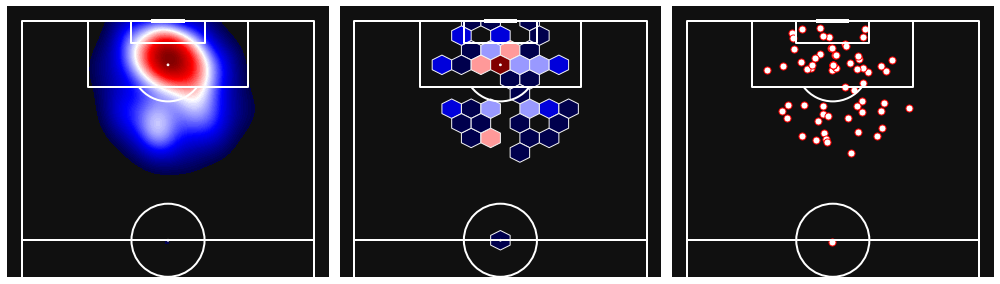

In [37]:
""" Shot Distribution of Croatia """
colormap = "seismic"

pitch = mplsoccer.VerticalPitch(line_color='white',
                                     line_zorder=2,
                                     pitch_color='#101010',
                                     half=True,
                                     pad_bottom=10)
fig, ax = pitch.draw(nrows=1, ncols=3, figsize=(14, 25))
kdeplot = pitch.kdeplot(Morocco_Shot_Data["startX"],
                        Morocco_Shot_Data["startY"],
                        ax=ax[0], shade=True,
                        levels=100, cmap=colormap)
hexmap = pitch.hexbin(Morocco_Shot_Data["startX"],
                      Morocco_Shot_Data["startY"],
                      ax=ax[1], edgecolors='#f4f4f4',
                      gridsize=(15, 15), cmap=colormap)
scatter = pitch.scatter(Morocco_Shot_Data["startX"],
                        Morocco_Shot_Data["startY"],
                        ax=ax[2],
                        s=50, c="white", edgecolors="red")

In [38]:
eventDataWC22Merged["period"].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [39]:
""" Shot Data excluding Penalty Shoot-outs """
Morocco_Shot_Data = eventDataWC22Merged[(eventDataWC22Merged["type.id"] == 16)
                                & (eventDataWC22Merged["team.id"] == Morocco_Team_id)
                                & (eventDataWC22Merged["period"] != 5)]

In [40]:
from matplotlib import rcParams

C:\Python\Python310\lib\site-packages\mplsoccer\_pitch_plot.py:172: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


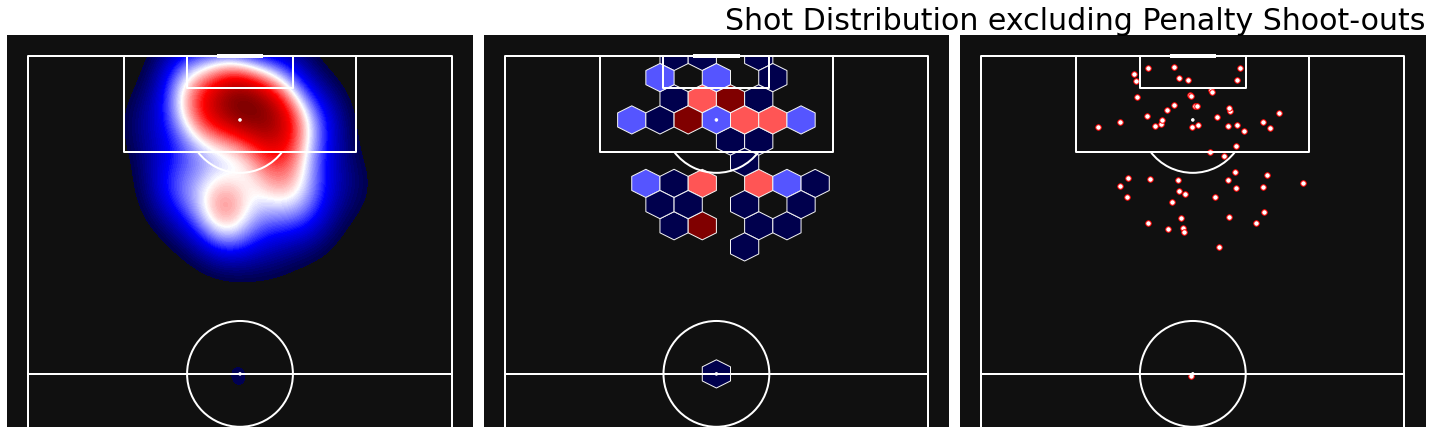

In [47]:
""" Shot Distribution excluding Penalty Shoot-outs """

colormap = "seismic"

pitch = mplsoccer.VerticalPitch(line_color='white',
                                     line_zorder=2,
                                     pitch_color='#101010',
                                     half=True,
                                     pad_bottom=10)
fig, ax = pitch.draw(nrows=1, ncols=3, figsize=(20, 35))
kdeplot = pitch.kdeplot(Morocco_Shot_Data["startX"],
                                  Morocco_Shot_Data["startY"],
                                  ax=ax[0], shade=True,
                                  levels=100, cmap=colormap)
hexmap = pitch.hexbin(Morocco_Shot_Data["startX"], Morocco_Shot_Data["startY"],
                      ax=ax[1], edgecolors='#f4f4f4',
                      gridsize=(15, 15), cmap=colormap)
scatter = pitch.scatter(Morocco_Shot_Data["startX"], Morocco_Shot_Data["startY"],
                        ax=ax[2],
                        s=30, c="white", edgecolors="red")


plt.title("Shot Distribution excluding Penalty Shoot-outs",loc = 'right',size = 30)
fig.savefig("../reports/WC22/morocco_shotdistrbtn_exps.jpg")
plt.show()

    
plt.close()

In [42]:
Morocco_Shot_Data["match_id"].nunique()

7

In [43]:
seasonMetaDataWC22.head()

,Unnamed: 0,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition.competition_id,competition.country_name,competition.competition_name,season.season_id,season.season_name,home_team.home_team_id,home_team.home_team_name,home_team.home_team_gender,home_team.home_team_group,home_team.country.id,home_team.country.name,home_team.managers,away_team.away_team_id,away_team.away_team_name,away_team.away_team_gender,away_team.away_team_group,away_team.country.id,away_team.country.name,away_team.managers,metadata.data_version,metadata.shot_fidelity_version,metadata.xy_fidelity_version,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name,winner,match_no
32,32,3857286,2022-11-20,18:00:00.000,0,2,available,available,2022-12-07T12:25:41.064384,2023-01-19T13:41:54.565056,1,43,International,FIFA World Cup,106,2022,3566,Qatar,male,A,185,Qatar,"[{'id': 5710, 'name': 'Félix Sánchez Bas', 'ni...",3565,Ecuador,male,A,65,Ecuador,"[{'id': 2881, 'name': 'Gustavo Julio Alfaro', ...",1.1.0,2,2,10,Group Stage,1001113,Al Bayt Stadium,185,Qatar,269.0,Daniele Orsato,112.0,Italy,Ecuador,1
31,31,3857282,2022-11-21,21:00:00.000,1,1,available,available,2023-02-15T14:45:55.987554,2023-02-12T18:22:20.047788,1,43,International,FIFA World Cup,106,2022,1839,United States,male,B,241,United States of America,"[{'id': 93, 'name': 'Gregg Berhalter', 'nickna...",907,Wales,male,B,249,Wales,"[{'id': 1000471, 'name': 'Robert Page', 'nickn...",1.1.0,2,2,10,Group Stage,1000793,Ahmad bin Ali Stadium,185,Qatar,2521.0,Abdulrahman Ibrahim Al Jassim,185.0,Qatar,Draw,2
55,55,3857271,2022-11-21,15:00:00.000,6,2,available,available,2023-02-07T23:41:11.222798,2022-11-22T10:55:42.569397,1,43,International,FIFA World Cup,106,2022,768,England,male,B,68,England,"[{'id': 277, 'name': 'Gareth Southgate', 'nick...",797,Iran,male,B,107,"Iran, Islamic Republic of","[{'id': 645, 'name': 'Carlos Manuel Brito Leal...",1.1.0,2,2,10,Group Stage,1000253,Sheikh Khalifa International Stadium,185,Qatar,2638.0,Raphael Claus,31.0,Brazil,England,3
44,44,3857285,2022-11-21,18:00:00.000,0,2,available,available,2023-02-25T18:09:51.853453,2023-01-04T12:22:28.003088,1,43,International,FIFA World Cup,106,2022,787,Senegal,male,A,202,Senegal,"[{'id': 635, 'name': 'Aliou Cissé', 'nickname'...",941,Netherlands,male,A,160,Netherlands,"[{'id': 788, 'name': 'Louis van Gaal', 'nickna...",1.1.0,2,2,10,Group Stage,1000838,Al Thumama Stadium,185,Qatar,986.0,Wilton Pereira Sampaio,31.0,Brazil,Netherlands,4
58,58,3857265,2022-11-22,18:00:00.000,0,0,available,available,2023-02-09T18:43:37.346278,2022-12-07T03:22:24.996783,1,43,International,FIFA World Cup,106,2022,794,Mexico,male,C,147,Mexico,"[{'id': 163, 'name': 'Gerardo Daniel Martino',...",789,Poland,male,C,182,Poland,"[{'id': 5294, 'name': 'Czesław Michniewicz', '...",1.1.0,2,2,10,Group Stage,1001115,Stadium 974,185,Qatar,1701.0,Chris Beath,14.0,Australia,Draw,5


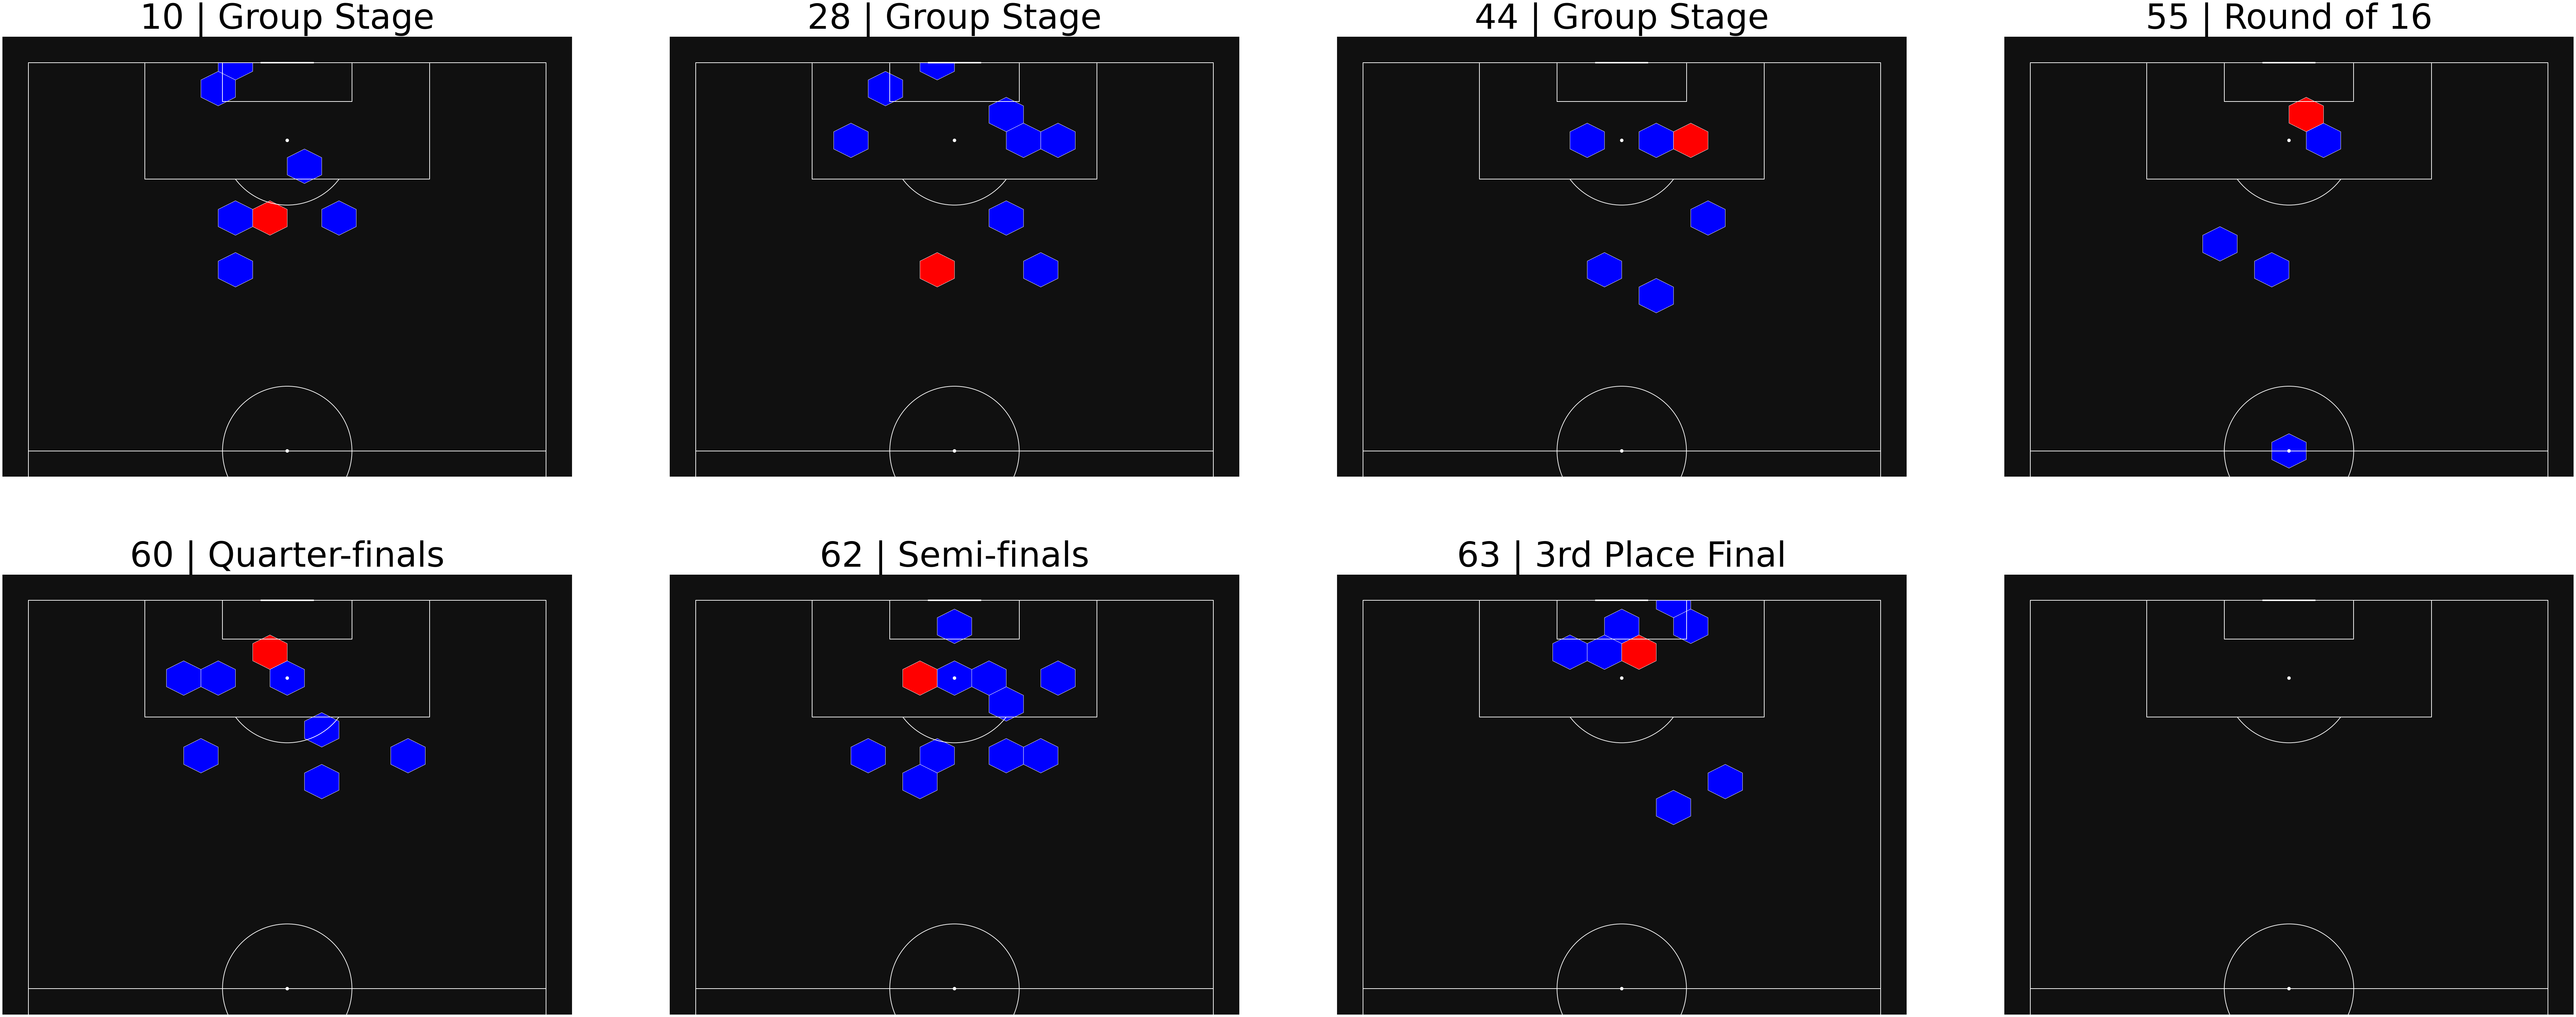

In [44]:
""" Match-wise Shot Distribution Maps """
colormap = "bwr"

pitch = mplsoccer.VerticalPitch(line_color='white',
                                pitch_color='#101010',
                                half=True,
                                line_zorder=2)
fig, axs = pitch.grid(nrows=2, ncols=4, space=0.1, figheight=40,
                      title_height=0, endnote_height=0,
                      grid_width=0.9, grid_height=0.98,
                      bottom=0.01, left=0.05)
matchIDs = Morocco_Shot_Data.sort_values("match_no")["match_id"].unique()
for idx, ax in enumerate(axs.flat):
    if idx < len(matchIDs):
        # Subset data for match in current iteration:
        matchShotsData = Morocco_Shot_Data[Morocco_Shot_Data["match_id"] == matchIDs[idx]]
        # Plot hexmap of shot distribution:
        hexmap = pitch.hexbin(matchShotsData["startX"],
                              matchShotsData["startY"],
                              ax=ax, edgecolors='#f4f4f4',
                              gridsize=(15, 15), cmap=colormap)
        # Set title:
        matchNo = matchShotsData["match_no"].unique().item()
        matchStage = matchShotsData["competition_stage.name"].unique().item()
        ax.set_title(str(matchNo) + " | " + matchStage,
                     fontsize=100)

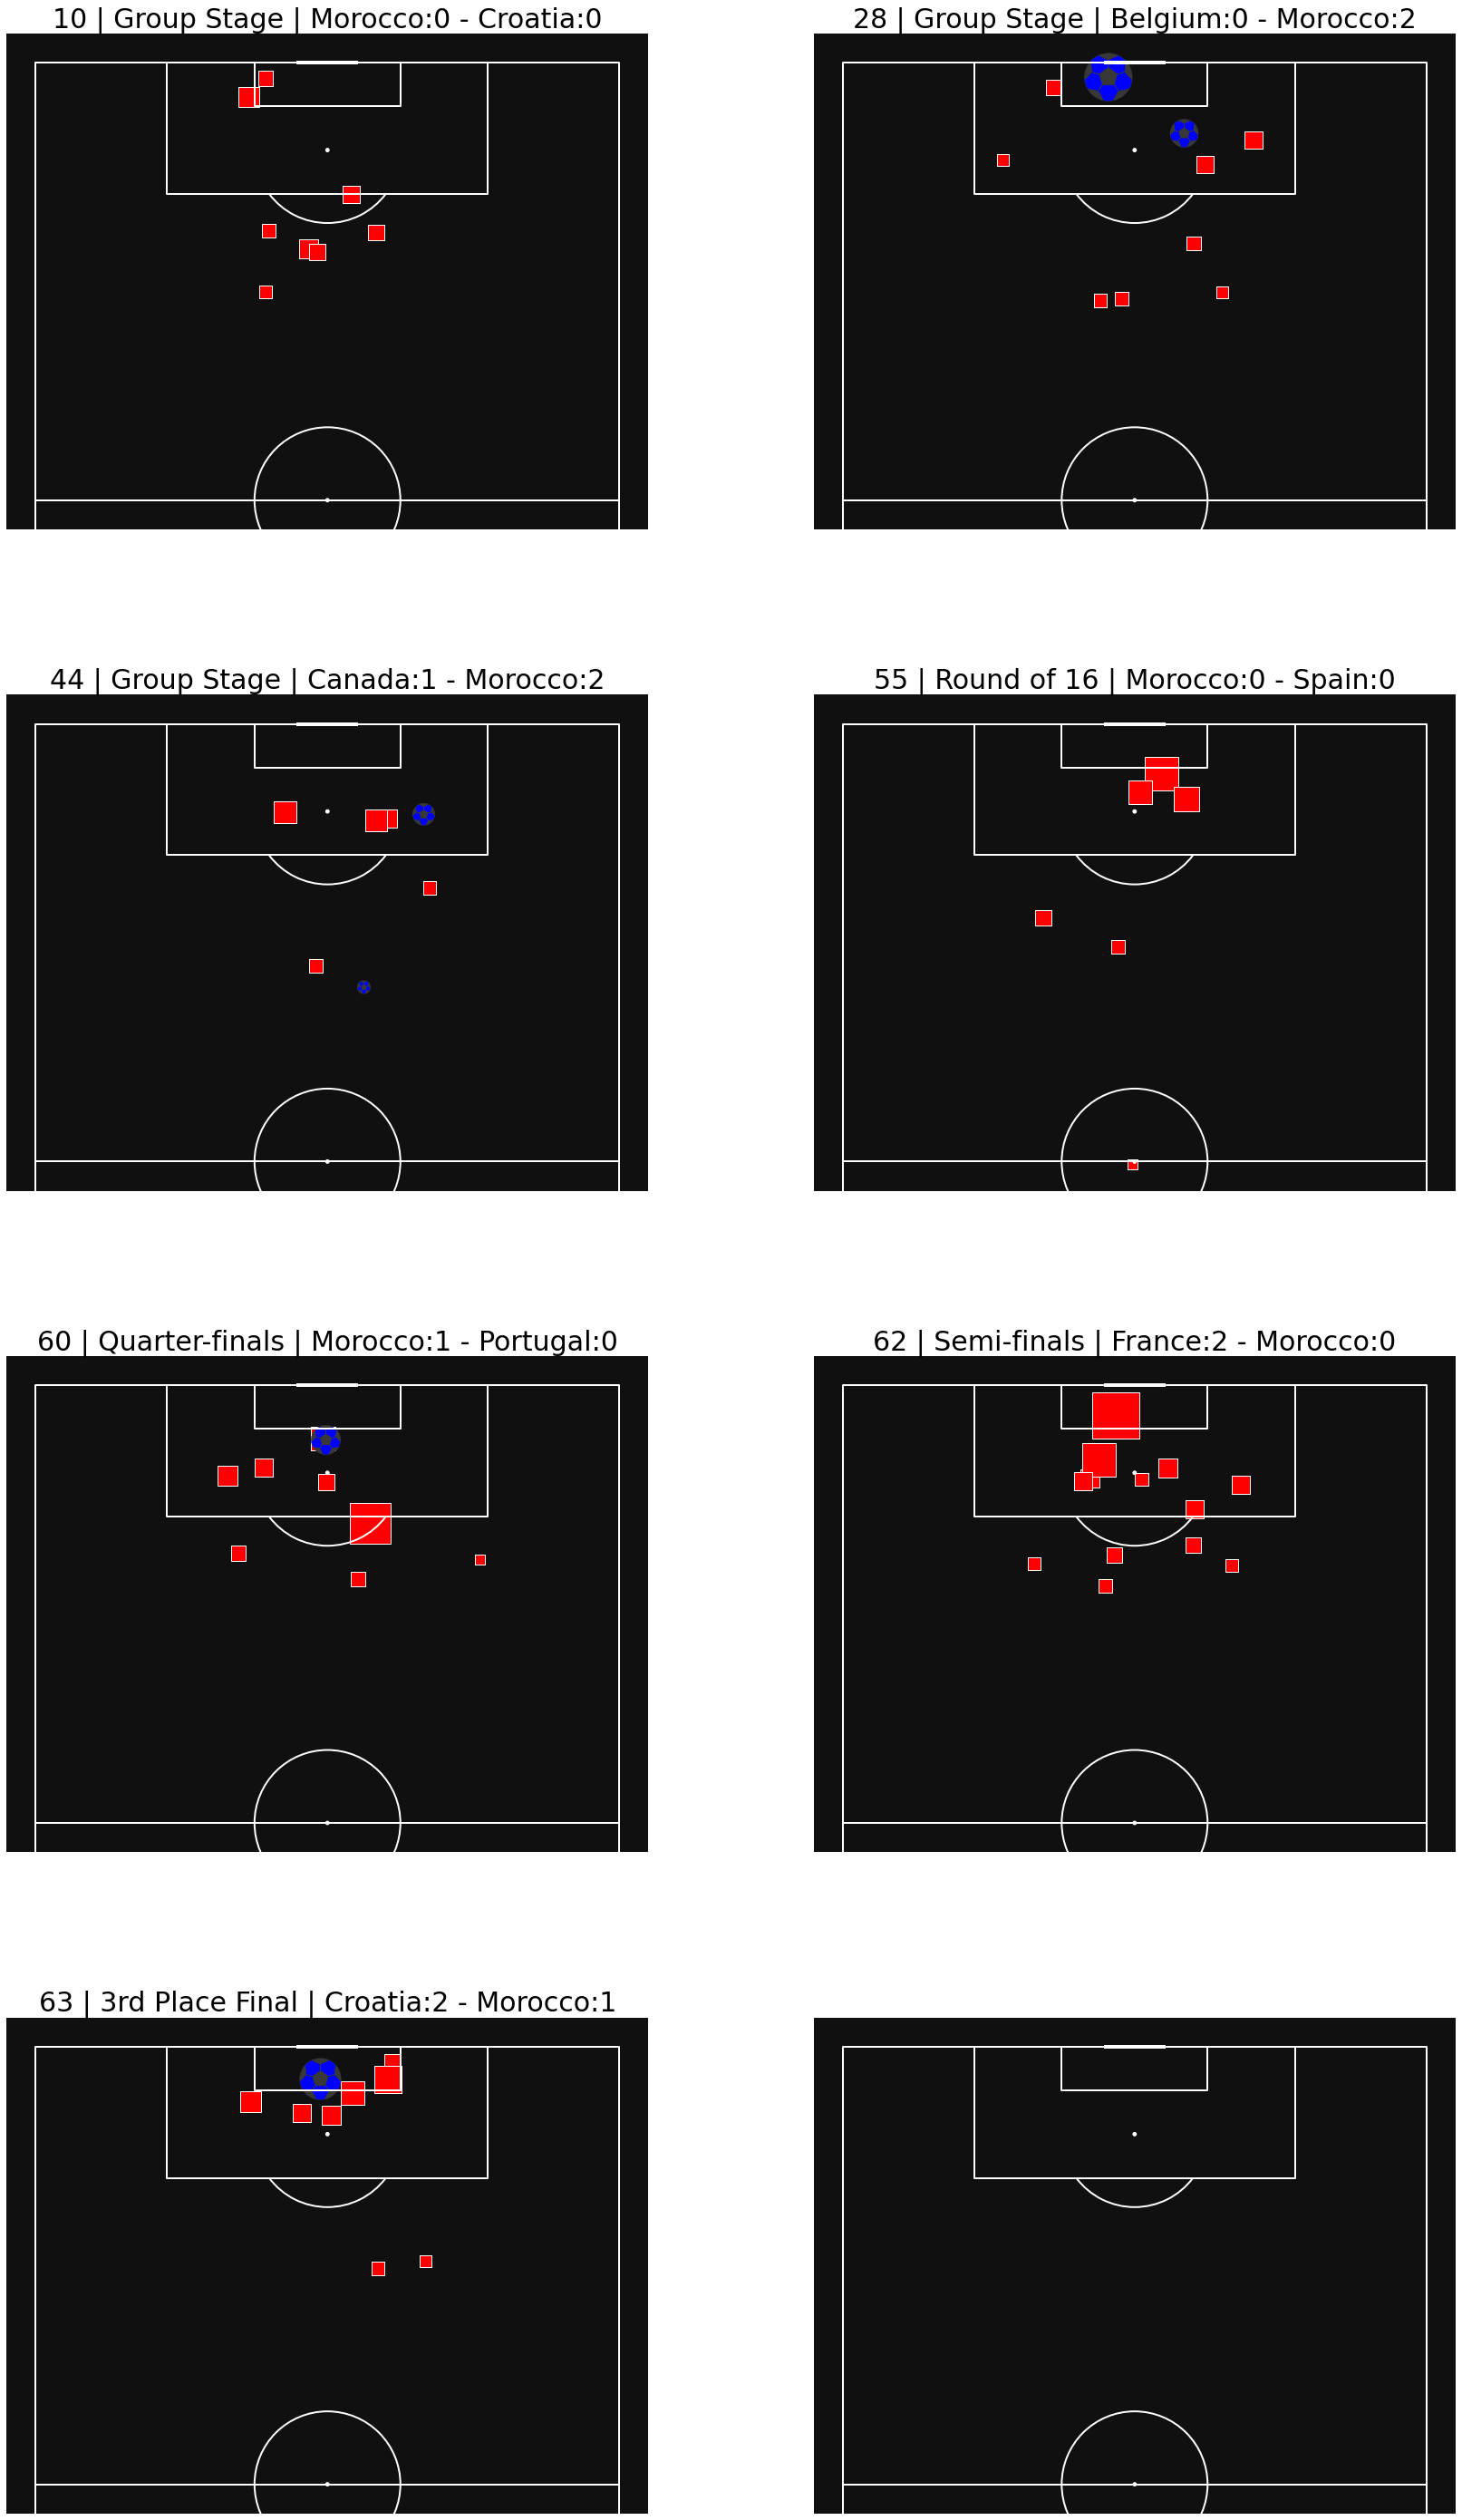

In [48]:
""" Match-wise Shot Distribution Maps (goals and non-goal shots separated)"""
colormap = "bwr"

pitch = mplsoccer.VerticalPitch(line_color='white',
                                pitch_color='#101010',
                                half=True,
                                line_zorder=2)
fig, axs = pitch.grid(nrows=4, ncols=2, space=0.2, figheight=40,
                      title_height=0, endnote_height=0,
                      grid_width=0.9, grid_height=0.95,
                      bottom=0.01, left=0.05)
matchIDs = Morocco_Shot_Data.sort_values("match_no")["match_id"].unique()
for idx, ax in enumerate(axs.flat):
    if idx < len(matchIDs):
        # Subset data for match in current iteration:
        matchShotsData = Morocco_Shot_Data[Morocco_Shot_Data["match_id"] == matchIDs[idx]]
        ngplayerData = matchShotsData[matchShotsData["shot.outcome.id"] != 97]
        gplayerData = matchShotsData[matchShotsData["shot.outcome.id"] == 97]

        sc = pitch.scatter(ngplayerData["startX"], ngplayerData["startY"],
                           s=(ngplayerData["shot.statsbomb_xg"] * 5000) + 100,
                           c="red",
                           edgecolors='#ffffff',  # give the markers a white border
                           marker="s",
                           ax=ax)
        sc2 = pitch.scatter(gplayerData["startX"], gplayerData["startY"],
                           s=(gplayerData["shot.statsbomb_xg"] * 5000) + 100,
                           c="blue",
                           edgecolors='#383838',  # give the markers a charcoal border
                           marker="football",
                           ax=ax)
        # Set title:
        matchNo = matchShotsData["match_no"].unique().item()
        matchStage = matchShotsData["competition_stage.name"].unique().item()
        matchHScore = matchShotsData["home_score"].unique().item()
        matchAScore = matchShotsData["away_score"].unique().item()
        matchHTeams = matchShotsData["home_team.home_team_name"].unique().item()
        matchATeams = matchShotsData["away_team.away_team_name"].unique().item()
        ax.set_title(str(matchNo) + " | " + matchStage  + " | " + matchHTeams + ":" + str(matchHScore) + " - " +matchATeams + ":" + str(matchAScore),
                     fontsize=30)
        
        fig.savefig("../reports/WC22/morocco_shotdistrbtn_G_n_NG.jpg")
plt.show()
plt.close()

# Defensive Analysis 

## Def Action Map

In [50]:
""" Def Action Data """
morocco_DefActionData = eventDataWC22Merged[(eventDataWC22Merged["type.id"].isin([4, 9, 10, 22])
                                            & (eventDataWC22Merged["team.id"] == Morocco_Team_id))]

C:\Python\Python310\lib\site-packages\mplsoccer\_pitch_plot.py:172: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


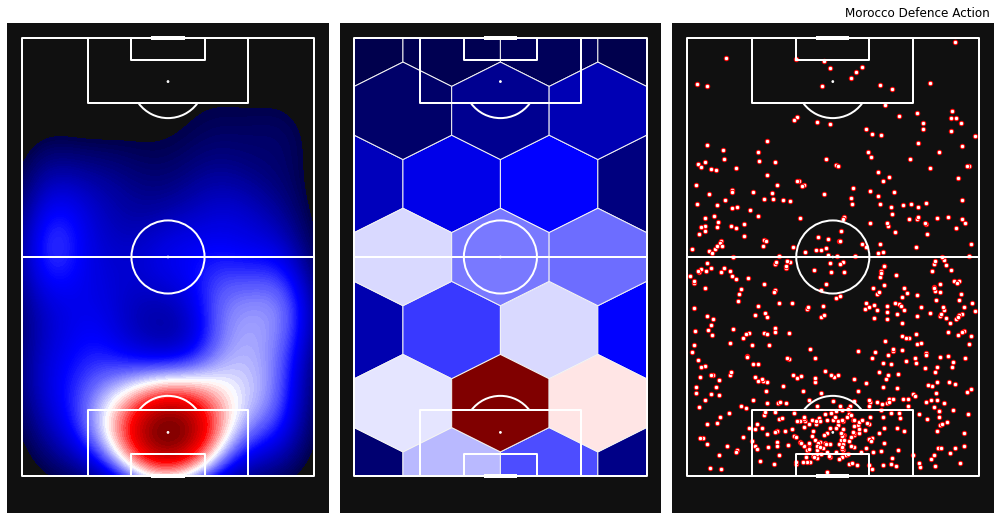

In [51]:
colormap = "seismic"

pitch = mplsoccer.VerticalPitch(line_color='white',
                                     line_zorder=2,
                                     pitch_color='#101010',
                                     pad_bottom=10)
fig, ax = pitch.draw(nrows=1, ncols=3, figsize=(14, 25))
kdeplot = pitch.kdeplot(morocco_DefActionData["startX"],
                        morocco_DefActionData["startY"],
                        ax=ax[0], shade=True,
                        levels=100, cmap=colormap)
hexmap = pitch.hexbin(morocco_DefActionData["startX"],
                      morocco_DefActionData["startY"],
                      ax=ax[1], edgecolors='#f4f4f4',
                      gridsize=(3, 3), cmap=colormap)
scatter = pitch.scatter(morocco_DefActionData["startX"],
                        morocco_DefActionData["startY"],
                        ax=ax[2],
                        s=20, c="white", edgecolors="red")
plt.title("Morocco Defence Action ",loc = 'right')

fig.savefig("../reports/WC22/morocco_dfnc_actin.jpg")
plt.show()

    
plt.close()

C:\Python\Python310\lib\site-packages\mplsoccer\_pitch_plot.py:172: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


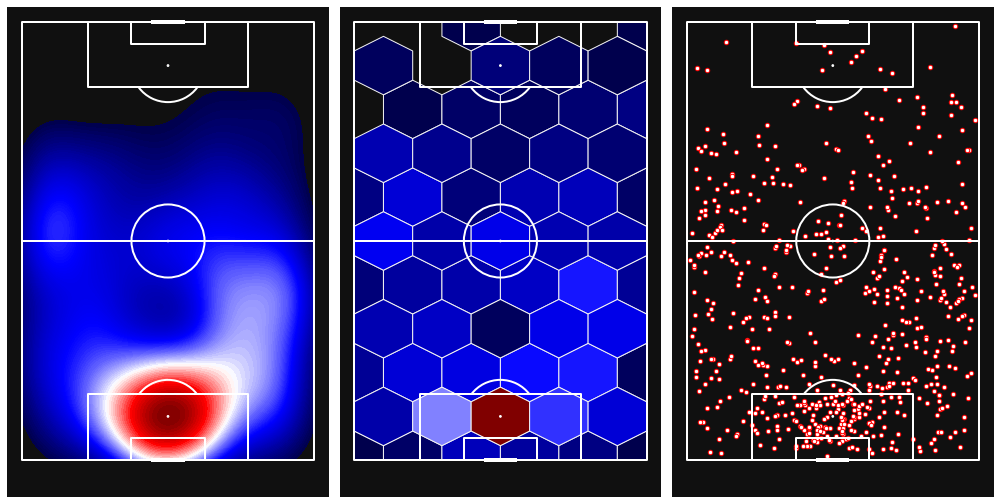

In [52]:
colormap = "seismic"

pitch = mplsoccer.VerticalPitch(line_color='white',
                                     line_zorder=2,
                                     pitch_color='#101010',
                                     pad_bottom=10)
fig, ax = pitch.draw(nrows=1, ncols=3, figsize=(14, 20))
kdeplot = pitch.kdeplot(morocco_DefActionData["startX"],
                                  morocco_DefActionData["startY"],
                                  ax=ax[0], shade=True,
                                  levels=100, cmap=colormap)
hexmap = pitch.hexbin(morocco_DefActionData["startX"], morocco_DefActionData["startY"],
                      ax=ax[1], edgecolors='#f4f4f4',
                      gridsize=(5, 5), cmap=colormap)
scatter = pitch.scatter(morocco_DefActionData["startX"], morocco_DefActionData["startY"],
                        ax=ax[2],
                        s=20, c="white", edgecolors="red")

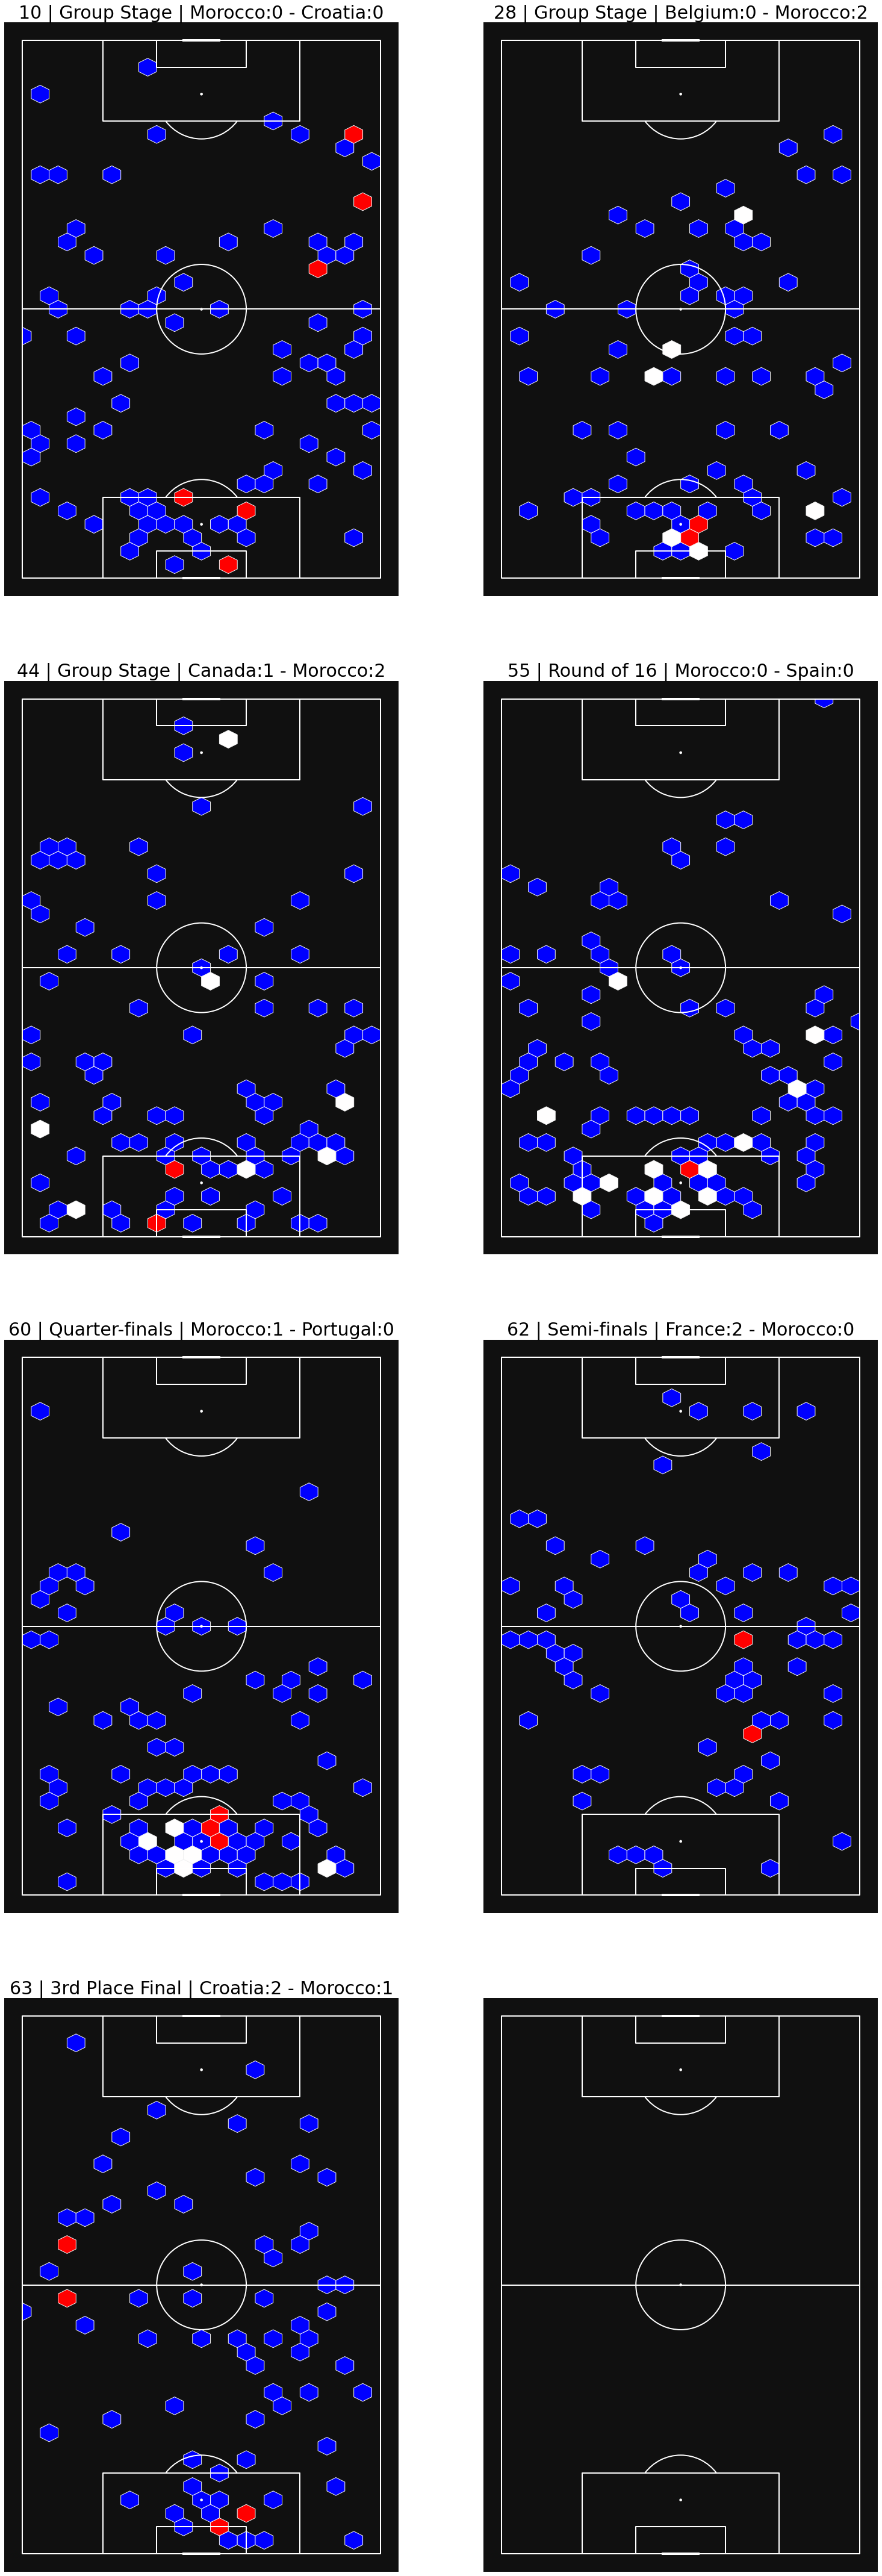

In [53]:
""" Match-wise Def Actions Distribution Maps """
colormap = "bwr"

pitch = mplsoccer.VerticalPitch(line_color='white',
                                pitch_color='#101010',
                                line_zorder=2)
fig, axs = pitch.grid(nrows=4, ncols=2, space=0.1, figheight=60,
                      title_height=0, endnote_height=0,
                      grid_width=0.9, grid_height=0.98,
                      bottom=0.01, left=0.05)
matchIDs = morocco_DefActionData.sort_values("match_no")["match_id"].unique()
for idx, ax in enumerate(axs.flat):
    if idx < len(matchIDs):
        # Subset data for match in current iteration:
        matchDefData = morocco_DefActionData[morocco_DefActionData["match_id"] == matchIDs[idx]]
        # Plot hexmap of shot distribution:
        hexmap = pitch.hexbin(matchDefData["startX"],
                              matchDefData["startY"],
                              ax=ax, edgecolors='#f4f4f4',
                              gridsize=(20, 20), cmap=colormap)
        # Set title:
        matchNo = matchDefData["match_no"].unique().item()
        matchStage = matchDefData["competition_stage.name"].unique().item()
        matchHScore = matchDefData["home_score"].unique().item()
        matchAScore = matchDefData["away_score"].unique().item()
        matchHTeams = matchDefData["home_team.home_team_name"].unique().item()
        matchATeams = matchDefData["away_team.away_team_name"].unique().item()
        ax.set_title(str(matchNo) + " | " + matchStage + " | " + matchHTeams + ":" + str(matchHScore) + " - " +matchATeams + ":" + str(matchAScore),
                     fontsize=30)
        fig.savefig("../reports/WC22/morocco_dfnc_act_matchwise.jpg")


## Pressure Map

In [55]:
""" Pressure Data """
morocco_PressureData = eventDataWC22Merged[(eventDataWC22Merged["type.id"] == 17)
                                & (eventDataWC22Merged["team.id"] == Morocco_Team_id)]

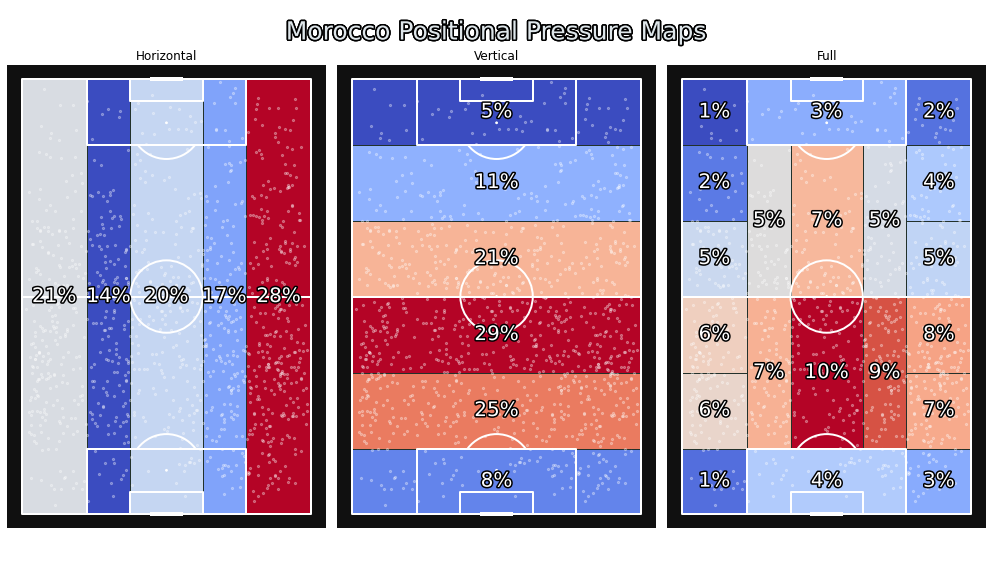

In [56]:
""" Distribution of Pressure on a Pitch Map """

# Set the Text Effects:
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

"""
Distribution of Pressure on a Pitch Map 
(Horizontal, Vertical and Full)
"""

# Set the Pitch Parameters:
pitch = mplsoccer.VerticalPitch(pitch_color='#101010', line_zorder=2, line_color='#ffffff')
# Draw the pitch according to the set Pitch Parameters:
fig, axs = pitch.grid(nrows=1, ncols=3, title_height=0.08,
                     axis=False)

pitchPos = ["horizontal", "vertical", "full"]
for idx, ax in enumerate(axs["pitch"]):
    pos = pitchPos[idx]
    # Calculating the pressure difference
    bin_statistic = pitch.bin_statistic_positional(morocco_PressureData["startX"],
                                                   morocco_PressureData["startY"],
                                                   statistic='count',
                                                   positional=pos,
                                                   normalize=True)
    # Plot the Heatmap according to the positions selected above
    pitch.heatmap_positional(bin_statistic,
                             ax=ax,
                             cmap='coolwarm',
                             edgecolors='#22312b')
    # Plot the points at the exact location of where the pressure was applied:
    pitch.scatter(morocco_PressureData["startX"],
                  morocco_PressureData["startY"],
                  c='white', s=5, ax=ax, alpha=0.3)
    # Add the Distribution count for each section of the pitch:
    labels = pitch.label_heatmap(bin_statistic, color='white', fontsize=20,
                                 ax=ax, ha='center', va='center',
                                 str_format='{:.0%}', path_effects=path_eff)
    axs['title'].text(0.5, 0.5, "Morocco Positional Pressure Maps", color='#dee6ea',
                  va='center', ha='center', path_effects=path_eff,
                  fontsize=25)
    ax.set_title(pos.capitalize())
    
    fig.savefig("../reports/WC22/morocco_dfnc_actin.jpg")
    

C:\Python\Python310\lib\site-packages\mplsoccer\_pitch_plot.py:172: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




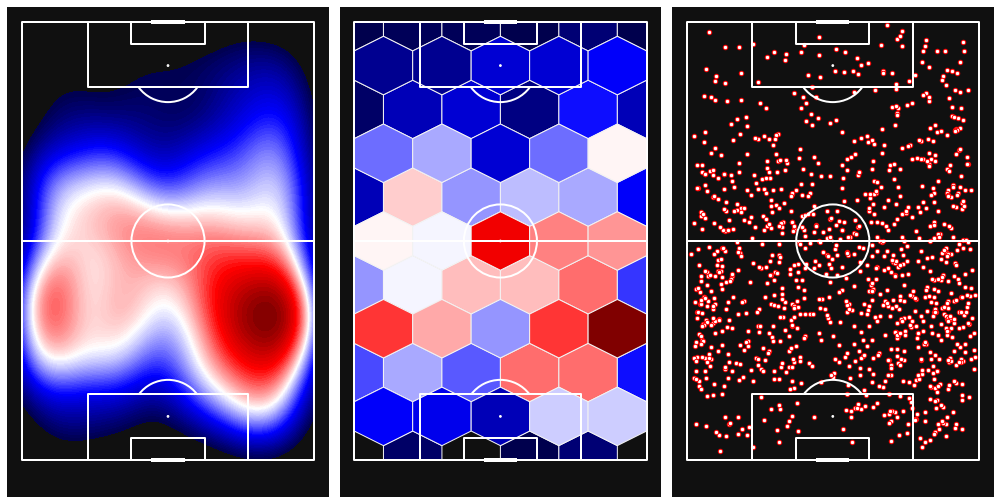

In [95]:
colormap = "seismic"

pitch = mplsoccer.VerticalPitch(line_color='white',
                                     line_zorder=2,
                                     pitch_color='#101010',
                                     pad_bottom=10)
fig, ax = pitch.draw(nrows=1, ncols=3, figsize=(14, 20))
kdeplot = pitch.kdeplot(morocco_PressureData["startX"],
                                  morocco_PressureData["startY"],
                                  ax=ax[0], shade=True,
                                  levels=100, cmap=colormap)
hexmap = pitch.hexbin(morocco_PressureData["startX"], morocco_PressureData["startY"],
                      ax=ax[1], edgecolors='#f4f4f4',
                      gridsize=(5, 5), cmap=colormap)
scatter = pitch.scatter(morocco_PressureData["startX"], morocco_PressureData["startY"],
                        ax=ax[2],
                        s=20, c="white", edgecolors="red")

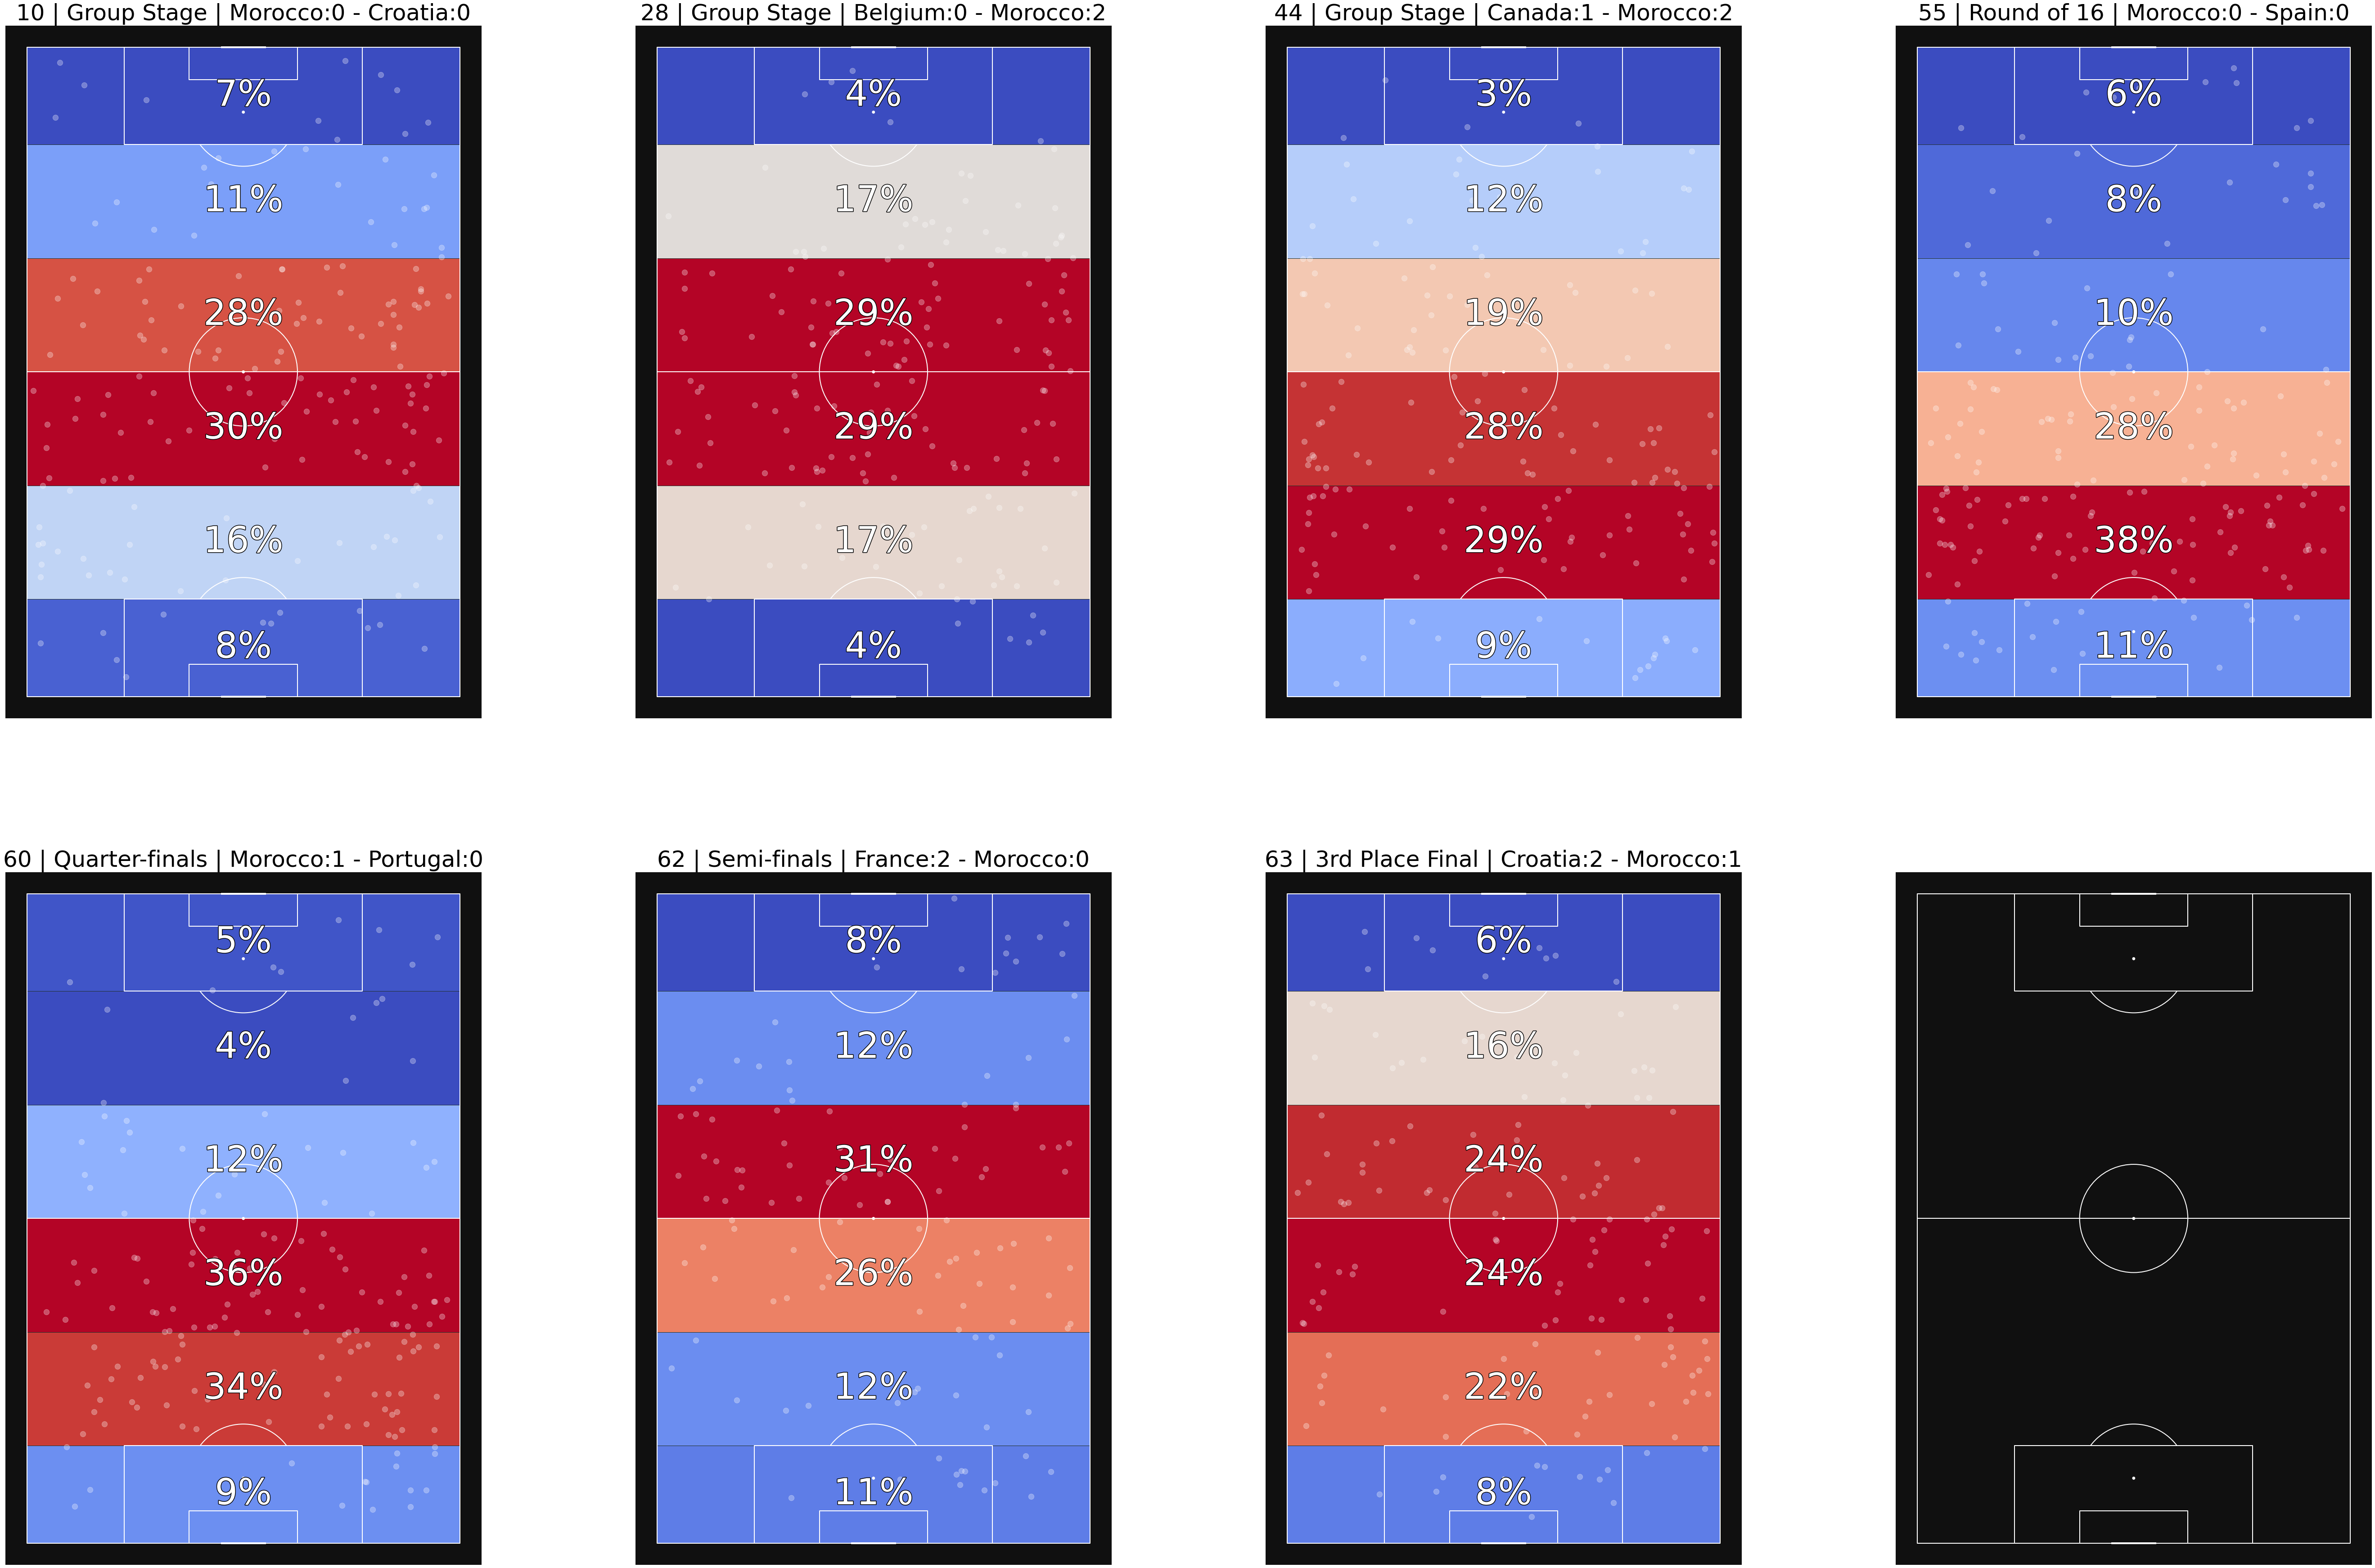

In [57]:
""" Match-wise Def Actions Distribution Maps """
colormap = "bwr"

pitch = mplsoccer.VerticalPitch(line_color='white',
                                pitch_color='#101010',
                                line_zorder=2)
fig, axs = pitch.grid(nrows=2, ncols=4, space=0.1, figheight=50,
                      title_height=0, endnote_height=0,
                      grid_width=0.9, grid_height=0.95,
                      bottom=0.01, left=0.05)
matchIDs = morocco_DefActionData.sort_values("match_no")["match_id"].unique()
for idx, ax in enumerate(axs.flat):
    if idx < len(matchIDs):
        # Subset data for match in current iteration:
        matchDefData = morocco_PressureData[morocco_PressureData["match_id"] == matchIDs[idx]]
        # Calculating the pressure difference
        bin_statistic = pitch.bin_statistic_positional(matchDefData["startX"],
                                                       matchDefData["startY"],
                                                       statistic='count',
                                                       positional="vertical",
                                                       normalize=True)
        # Plot the Heatmap according to the positions selected above
        pitch.heatmap_positional(bin_statistic,
                                 ax=ax,
                                 cmap='coolwarm',
                                 edgecolors='#22312b')
        # Plot the points at the exact location of where the pressure was applied:
        pitch.scatter(matchDefData["startX"],
                      matchDefData["startY"],
                      c='white', s=150, ax=ax, alpha=0.3)
        # Add the Distribution count for each section of the pitch:
        labels = pitch.label_heatmap(bin_statistic, color='white', fontsize=80,
                                     ax=ax, ha='center', va='center',
                                     str_format='{:.0%}', path_effects=path_eff)
        # Set title:
        matchNo = matchDefData["match_no"].unique().item()
        matchStage = matchDefData["competition_stage.name"].unique().item()
        matchHScore = matchDefData["home_score"].unique().item()
        matchAScore = matchDefData["away_score"].unique().item()
        matchHTeams = matchDefData["home_team.home_team_name"].unique().item()
        matchATeams = matchDefData["away_team.away_team_name"].unique().item()
        ax.set_title(str(matchNo) + " | " + matchStage + " | " + matchHTeams + ":" + str(matchHScore) + " - " +matchATeams + ":" + str(matchAScore),
                     fontsize=50)
        fig.savefig("../reports/WC22/morocco_dfnc_actn_matchwise.jpg")

# Comparison Analysis Per90 | All Teams

## Attacking Comparison Per90 | Teams atleast played Round 16

Attacking Parameters:
1. Goals
1. xG
1. Shots
1. Shots OT
1. Shot Accuracy
1. Goal Conversion
1. Fouls Won

In [58]:
eventDataWC22 = eventDataWC22[eventDataWC22["period"] != 5]

In [59]:
allTeamsAtkDataWC22 = eventDataWC22.groupby(["team.id"]).agg({"team.name": "first",
                                       "match_id": "nunique",
                                        "shot.outcome.id": [lambda x: (x ==97).sum(),
                                                            lambda x: x.isin([97,100]).sum(),
                                                            "count"],
                                        "shot.statsbomb_xg": "sum",
                                        "type.id": lambda x: (x == 21).sum()})

In [60]:
allTeamsAtkDataWC22

team.name match_id shot.outcome.id                   \
                 first  nunique      <lambda_0> <lambda_1> count   
team.id                                                            
768            England        5              13         28    63   
770            Germany        3               6         24    68   
771             France        7              16         35   102   
772              Spain        4               9         16    48   
773        Switzerland        4               5         13    37   
776            Denmark        3               1         11    35   
777            Tunisia        3               1          8    32   
778              Japan        4               5         14    44   
779          Argentina        7              15         48   101   
780           Portugal        5              12         26    66   
781             Brazil        5               8         43    95   
782            Belgium        3               1         10    35   
783            Uruguay        3               2         10    33   
785            Croatia        7               8         26    79   
786             Serbia        3               5          9    32   
787            Senegal        4               5         12    50   
788            Morocco        7               6         16    62   
789             Poland        4               3          7    31   
791        South Korea        4               5         18    48   
792          Australia        4               3          8    26   
794             Mexico        3               2         15    41   
795         Costa Rica        3               2          6    11   
797               Iran        3               4          9    33   
799       Saudi Arabia        3               3          9    30   
907              Wales        3               1          7    24   
941        Netherlands        5              10         16    43   
1833            Canada        3               1          5    35   
1839     United States        4               3         13    46   
2722          Cameroon        3               4         16    28   
3565           Ecuador        3               4         11    30   
3566             Qatar        3               1          6    20   
4885             Ghana        3               5         10    25   

        shot.statsbomb_xg  type.id  
                      sum <lambda>  
team.id                             
768              8.735856       77  
770              8.231078       30  
771             11.821858      100  
772              4.754127       57  
773              6.090516       54  
776              3.193014       24  
777              2.410452       35  
778              4.249571       43  
779             13.936943      132  
780              7.312710       74  
781             10.502593       77  
782              3.694493       41  
783              3.270534       40  
785              6.901702      103  
786              3.090398       30  
787              4.284207       64  
788              5.544370       88  
789              4.663221       50  
791              3.604595       35  
792              1.578172       33  
794              3.057650       49  
795              1.234112       39  
797              3.830406       29  
799              3.201549       39  
907              2.218981       37  
941              4.993787       55  
1833             3.928626       40  
1839             3.938538       49  
2722             3.066743       43  
3565             3.806728       39  
3566             1.407992       45  
4885             3.353253       41

In [61]:
allTeamsAtkDataWC22.columns = ["teamName", "nMatches", "Goals", "shotsOT", "totShots", "xG","foulsWon"]

In [62]:
allTeamsAtkDataWC22

,teamName,nMatches,Goals,shotsOT,totShots,xG,foulsWon
team.id,,,,,,,
768,England,5,13,28,63,8.735856,77
770,Germany,3,6,24,68,8.231078,30
771,France,7,16,35,102,11.821858,100
772,Spain,4,9,16,48,4.754127,57
773,Switzerland,4,5,13,37,6.090516,54
776,Denmark,3,1,11,35,3.193014,24
777,Tunisia,3,1,8,32,2.410452,35
778,Japan,4,5,14,44,4.249571,43
779,Argentina,7,15,48,101,13.936943,132


In [64]:
 teamMatchMinsWC22df = eventDataWC22.drop_duplicates\
    (subset=["team.id","match_id"]).groupby(["team.id"]).agg({"maxMinsMatch": "sum"})

In [65]:
teamAtkWisedf22 = pd.concat([allTeamsAtkDataWC22,teamMatchMinsWC22df],axis = 1).drop_duplicates()

In [66]:
teamAtkWisedf22=teamAtkWisedf22[teamAtkWisedf22["nMatches"] >= 4]

In [67]:
Per90Cols = ["Goals","shotsOT","totShots","xG","foulsWon"]


In [68]:
for col in Per90Cols:
    teamAtkWisedf22[col + "Per90"]=teamAtkWisedf22[col].divide(teamAtkWisedf22["maxMinsMatch"]).multiply(90).round(1)
    

In [69]:
teamAtkWisedf22

,teamName,nMatches,Goals,shotsOT,totShots,xG,foulsWon,maxMinsMatch,GoalsPer90,shotsOTPer90,totShotsPer90,xGPer90,foulsWonPer90
team.id,,,,,,,,,,,,,
768,England,5,13,28,63,8.735856,77,485,2.4,5.2,11.7,1.6,14.3
771,France,7,16,35,102,11.821858,100,715,2.0,4.4,12.8,1.5,12.6
772,Spain,4,9,16,48,4.754127,57,415,2.0,3.5,10.4,1.0,12.4
773,Switzerland,4,5,13,37,6.090516,54,385,1.2,3.0,8.6,1.4,12.6
778,Japan,4,5,14,44,4.249571,43,415,1.1,3.0,9.5,0.9,9.3
779,Argentina,7,15,48,101,13.936943,132,739,1.8,5.8,12.3,1.7,16.1
780,Portugal,5,12,26,66,7.312710,74,488,2.2,4.8,12.2,1.3,13.6
781,Brazil,5,8,43,95,10.502593,77,510,1.4,7.6,16.8,1.9,13.6
785,Croatia,7,8,26,79,6.901702,103,725,1.0,3.2,9.8,0.9,12.8


In [70]:
FinalTeamsAtkDataWC = ["GoalsPer90","shotsOTPer90","totShotsPer90","xGPer90","foulsWonPer90"]

In [71]:
params = FinalTeamsAtkDataWC

In [72]:
pizzaData = pd.DataFrame(index=["Morocco", "League Per90"],
                         columns=params)

In [73]:
pizzaData

,GoalsPer90,shotsOTPer90,totShotsPer90,xGPer90,foulsWonPer90
Morocco,NaN,NaN,NaN,NaN,NaN
League Per90,NaN,NaN,NaN,NaN,NaN


In [74]:
MoroccoTeamId=788

In [75]:
teamAtkWisedf22.loc[MoroccoTeamId, params].astype(float)

GoalsPer90        0.8
shotsOTPer90      2.1
totShotsPer90     8.0
xGPer90           0.7
foulsWonPer90    11.3
Name: 788, dtype: float64

In [76]:
pizzaData.loc["Morocco"] = teamAtkWisedf22.loc[MoroccoTeamId, params].astype(float).round(1).tolist()

In [77]:
pizzaData

,GoalsPer90,shotsOTPer90,totShotsPer90,xGPer90,foulsWonPer90
Morocco,0.8,2.1,8.0,0.7,11.3
League Per90,NaN,NaN,NaN,NaN,NaN


In [78]:
teamAtkWisedf22.loc[(teamAtkWisedf22.index != MoroccoTeamId),
                                                   params].round(1)

,GoalsPer90,shotsOTPer90,totShotsPer90,xGPer90,foulsWonPer90
team.id,,,,,
768,2.4,5.2,11.7,1.6,14.3
771,2.0,4.4,12.8,1.5,12.6
772,2.0,3.5,10.4,1.0,12.4
773,1.2,3.0,8.6,1.4,12.6
778,1.1,3.0,9.5,0.9,9.3
779,1.8,5.8,12.3,1.7,16.1
780,2.2,4.8,12.2,1.3,13.6
781,1.4,7.6,16.8,1.9,13.6
785,1.0,3.2,9.8,0.9,12.8


In [79]:
teamAtkWisedf22.loc[(teamAtkWisedf22.index != MoroccoTeamId),
                                                   params].mean().round(1).tolist()

[1.4, 3.8, 10.6, 1.2, 12.0]

In [80]:

pizzaData.loc["League Per90"] = teamAtkWisedf22.loc[(teamAtkWisedf22.index != MoroccoTeamId),
                                                   params].mean().round(1).tolist()

In [81]:
pizzaData

,GoalsPer90,shotsOTPer90,totShotsPer90,xGPer90,foulsWonPer90
Morocco,0.8,2.1,8.0,0.7,11.3
League Per90,1.4,3.8,10.6,1.2,12.0


In [83]:
pizzaData.loc[["Morocco", "League Per90"]].min()

GoalsPer90        0.8
shotsOTPer90      2.1
totShotsPer90     8.0
xGPer90           0.7
foulsWonPer90    11.3
dtype: object

In [84]:
values = pizzaData.loc["Morocco"].tolist()
values_2 = pizzaData.loc["League Per90"].tolist()

In [85]:
values

[0.8, 2.1, 8.0, 0.7, 11.3]

In [86]:
values_2

[1.4, 3.8, 10.6, 1.2, 12.0]

In [87]:
teamAtkWisedf22[params].min()

GoalsPer90       0.7
shotsOTPer90     1.6
totShotsPer90    6.1
xGPer90          0.4
foulsWonPer90    7.7
dtype: float64

In [88]:
minRange = teamAtkWisedf22[params].min().tolist()
maxRange = teamAtkWisedf22[params].max().tolist()

In [89]:
minRange

[0.7, 1.6, 6.1, 0.4, 7.7]

In [90]:
maxRange

[2.4, 7.6, 16.8, 1.9, 16.1]

In [91]:
from mplsoccer import PyPizza, FontManager

In [92]:
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')

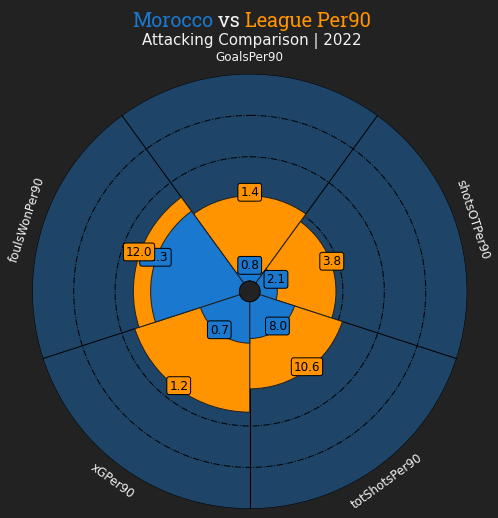

In [93]:
# instantiate PyPizza class
baker = mplsoccer.PyPizza(
    params=params,                  # list of parameters
    min_range=minRange,
    max_range=maxRange,
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    last_circle_color="#000000",    # color of last circle
    other_circle_ls="-.",           # linestyle for other circles
    other_circle_lw=1,                 
    other_circle_color="#000000"
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                     
    compare_values=values_2,    
    figsize=(12, 8),
    color_blank_space="same",
    blank_alpha=0.4,
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#222222",
        zorder=2, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#FF9300", edgecolor="#222222",
        zorder=2, linewidth=1,
    ),
    kwargs_params=dict(
        color="#F2F2F2", fontsize=12,
        va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                          # values to be used when adding parameter-values labels
    kwargs_compare_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(edgecolor="#000000", facecolor="#FF9300", boxstyle="round,pad=0.2", lw=1)
    ),                          # values to be used when adding parameter-values labels
)

# adjust the texts
params_offset = [False, False, False, False, False]
# to adjust text for comparison-values-text pass adj_comp_values=True
baker.adjust_texts(params_offset, offset=-0.2)

# add title
fig_text(
    0.515, 0.99, "<Morocco> vs <League Per90>",
    size=20, fig=fig,
    highlight_textprops=[{"color": '#1A78CF'}, {"color": '#FF9300'}],
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.932,
    "Attacking Comparison | 2022",
    size=15,
    ha="center", color="#F2F2F2"
)

fig.savefig("../reports/WC22/morocco_atckgAvg_legPer90.jpg")

## Defensive Comparison Per90 | Teams atleast played Round 16

Defensive Parameters:
1. Blocks
1. Clearance
1. Interceptions
1. Pressure	
1. Tackles
1. TacklesWon

In [94]:
allTeamsDefDataWC22 = eventDataWC22.groupby(["team.id"]).agg({"team.name": "first",
                                              "match_id": "nunique",
                                                              "type.id": [lambda x: (x == 6).sum(),
                                                                          lambda x: (x == 9).sum(),
                                                                          lambda x: (x == 10).sum(),
                                                                          lambda x: (x == 17).sum()],
                                                              "duel.type.id": [lambda x: (x == 11).sum()],
                                                              "duel.outcome.id": [lambda x: x.isin([4,15,16,17]).sum()]})

In [95]:
allTeamsDefDataWC22.columns = ["TeamName", "NumMatches", "Blocks", "Clearance","Interceptions",
                               "Pressure","Tackles","TacklesWon"]

In [96]:
Per90col = ["Blocks","Clearance","Interceptions","Pressure","Tackles","TacklesWon"]

In [97]:
allTeamsDefDataWC22 = pd.concat([allTeamsDefDataWC22,teamMatchMinsWC22df],axis = 1).drop_duplicates()

In [98]:
allTeamsDefDataWC22 = allTeamsDefDataWC22[allTeamsDefDataWC22["NumMatches"]>=4]

In [99]:
for col in Per90col:
    allTeamsDefDataWC22[col + "Per90"]=allTeamsDefDataWC22[col].divide(allTeamsDefDataWC22["maxMinsMatch"]).multiply(90).round(2)
    

In [100]:
allTeamsDefDataWC22

,TeamName,NumMatches,Blocks,Clearance,Interceptions,Pressure,Tackles,TacklesWon,maxMinsMatch,BlocksPer90,ClearancePer90,InterceptionsPer90,PressurePer90,TacklesPer90,TacklesWonPer90
team.id,,,,,,,,,,,,,,,
768,England,5,71,58,46,485,66,44,485,13.18,10.76,8.54,90.00,12.25,8.16
771,France,7,125,114,95,901,140,83,715,15.73,14.35,11.96,113.41,17.62,10.45
772,Spain,4,55,35,37,445,58,42,415,11.93,7.59,8.02,96.51,12.58,9.11
773,Switzerland,4,53,97,43,444,55,30,385,12.39,22.68,10.05,103.79,12.86,7.01
778,Japan,4,100,105,51,691,66,38,415,21.69,22.77,11.06,149.86,14.31,8.24
779,Argentina,7,126,141,70,980,134,77,739,15.35,17.17,8.53,119.35,16.32,9.38
780,Portugal,5,73,84,31,528,69,47,488,13.46,15.49,5.72,97.38,12.73,8.67
781,Brazil,5,88,69,42,606,97,62,510,15.53,12.18,7.41,106.94,17.12,10.94
785,Croatia,7,130,157,85,949,138,87,725,16.14,19.49,10.55,117.81,17.13,10.80


In [101]:
FinalTeamsDefData = ["BlocksPer90","ClearancePer90","InterceptionsPer90","PressurePer90","TacklesPer90","TacklesWonPer90"] 

In [104]:
params_def = FinalTeamsDefData

In [105]:
pizzaData_def = pd.DataFrame(index=["Morocco", "League Per90"],
                         columns=params)

In [107]:
allTeamsDefDataWC22.loc[MoroccoTeamId, params_def].astype(float)

BlocksPer90            17.28
ClearancePer90         22.05
InterceptionsPer90     11.48
PressurePer90         139.90
TacklesPer90           17.66
TacklesWonPer90        10.19
Name: 788, dtype: float64

In [108]:
pizzaData_def.loc["Morocco"] = allTeamsDefDataWC22.loc[MoroccoTeamId, params].astype(float).round(1).tolist()

In [109]:
allTeamsDefDataWC22.loc[(allTeamsDefDataWC22.index != MoroccoTeamId),
                                                   params].round(1)

,BlocksPer90,ClearancePer90,InterceptionsPer90,PressurePer90,TacklesPer90,TacklesWonPer90
team.id,,,,,,
768,13.2,10.8,8.5,90.0,12.2,8.2
771,15.7,14.4,12.0,113.4,17.6,10.4
772,11.9,7.6,8.0,96.5,12.6,9.1
773,12.4,22.7,10.0,103.8,12.9,7.0
778,21.7,22.8,11.1,149.9,14.3,8.2
779,15.4,17.2,8.5,119.4,16.3,9.4
780,13.5,15.5,5.7,97.4,12.7,8.7
781,15.5,12.2,7.4,106.9,17.1,10.9
785,16.1,19.5,10.6,117.8,17.1,10.8


In [112]:
allTeamsDefDataWC22.loc[(allTeamsDefDataWC22.index != MoroccoTeamId),
                                                   params].mean().round(1).tolist()

[16.2, 18.3, 9.1, 114.4, 14.3, 8.7]

In [113]:
pizzaData_def.loc["League Per90"] = allTeamsDefDataWC22.loc[(allTeamsDefDataWC22.index != MoroccoTeamId),
                                                   params].mean().round(1).tolist()

In [115]:
pizzaData_def.loc[["Morocco", "League Per90"]].min()

BlocksPer90            16.2
ClearancePer90         18.3
InterceptionsPer90      9.1
PressurePer90         114.4
TacklesPer90           14.3
TacklesWonPer90         8.7
dtype: object

In [116]:
pizzaData_def.loc["valuesMin"] = pizzaData_def.loc[["Morocco", "League Per90"]].min()
pizzaData_def.loc["valuesMax"] = pizzaData_def.loc[["Morocco", "League Per90"]].max()

In [120]:
values_def = pizzaData_def.loc["Morocco"].tolist()
values_2def = pizzaData_def.loc["League Per90"].tolist()

In [121]:
values_def

[17.3, 22.0, 11.5, 139.9, 17.7, 10.2]

In [122]:
values_2def

[16.2, 18.3, 9.1, 114.4, 14.3, 8.7]

In [123]:
minRange_def = allTeamsDefDataWC22[params].min().tolist()
maxRange_def = allTeamsDefDataWC22[params].max().tolist()

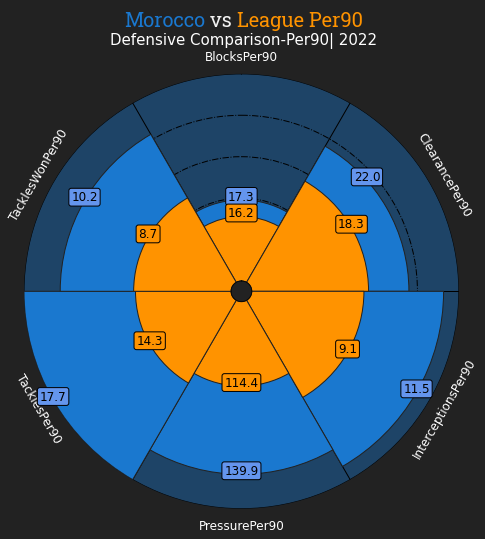

In [125]:
# instantiate PyPizza class
baker = mplsoccer.PyPizza(
    params=params_def,                  # list of parameters
    min_range=minRange_def,
    max_range=maxRange_def,
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    last_circle_color="#000000",    # color of last circle
    other_circle_ls="-.",           # linestyle for other circles
    other_circle_lw=1,                 
    other_circle_color="#000000"
)

# plot pizza
fig, ax = baker.make_pizza(
    values_def,                    
    compare_values=values_2def,    
    figsize=(12, 8),
    color_blank_space="same",
    blank_alpha=0.4,
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#222222",
        zorder=2, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#FF9300", edgecolor="#222222",
        zorder=2, linewidth=1,
    ),
    kwargs_params=dict(
        color="#ffffff", fontsize=12,
        va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                          # values to be used when adding parameter-values labels
    kwargs_compare_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(edgecolor="#000000", facecolor="#FF9300", boxstyle="round,pad=0.2", lw=1)
    ),                          # values to be used when adding parameter-values labels
)

# adjust the texts
params_offset = [False, True, False, False, False, False]
# to adjust text for comparison-values-text pass adj_comp_values=True
baker.adjust_texts(params_offset, offset=-0.2)

# add title
fig_text(
    0.515, 0.99, "<Morocco> vs <League Per90>",
    size=20, fig=fig,
    highlight_textprops=[{"color": '#1A78CF'}, {"color": '#FF9300'}],
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.932,
    "Defensive Comparison-Per90| 2022",
    size=15,
    ha="center", color="#ffffff"
)

fig.savefig("../reports/WC22/morocco_dfncAvg_legAvg.jpg")